#  ANALYSIS FOR ALL FILL [SINGLE + MULTI] 

###### IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib import cm

## CONFIG 

In [2]:
FILL = 4499
RUN = 9920

## SAVE THIS DATAFRAME 

In [3]:
store_base = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/results/analysis/analysis_charts_png/'

## PLOT FUNCTIONS 

In [4]:
def print_event_percent_df(df, number_of_rows, agg_column_name='Events Number', potential_tracks=False):
    df = df.copy()
    
    agg_number = df[agg_column_name].sum()
    print("Total events number: {}".format(agg_number))
    df['Percent'] = df[agg_column_name] / agg_number * 100    
    
    other_number = df[number_of_rows:][agg_column_name].sum()
    other_percent = df[number_of_rows:]['Percent'].sum()
    
    if potential_tracks:
        df['MaxUV'] = df.index
        df['PTracks'] = df[agg_column_name] * df['MaxUV']
        
        potential_tracks_sum = df[:number_of_rows]['PTracks'].sum()
        print("Potential track sum: {}".format(potential_tracks_sum))
        df['PT percent'] = df['PTracks'] / potential_tracks_sum * 100
    
    
    df[agg_column_name] = df[agg_column_name] / 1000000.0
    
    print(df[:number_of_rows].round(3))
    print("{}\t{}\t{}".format(number_of_rows+1, other_number, other_percent))
    return df[:number_of_rows]

### 1_max_line_df 

In [111]:
def get_df_to_plot_1_max_line():
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_1_max_line_df.csv".format(FILL, RUN))
    df = df[['Max line no', 'Events Number']]
    
    # Only to rename index
    df['Max [u|v] line number'] = df['Max line no']
    df = df[['Max [u|v] line number', 'Events Number']]
    df = df.set_index('Max [u|v] line number')
    
    return df

In [49]:
_1_max_line_df = get_df_to_plot_1_max_line()

In [102]:
print_event_percent_df(_1_max_line_df, 4)

Total events number: 300610618
                   Events Number  Percent
Max [u|v] line no                        
1                        250.112   83.201
2                         26.158    8.701
3                          7.196    2.394
4                          6.176    2.054
5	10968704	3.64880790738


,Events Number,Percent
Max [u|v] line no,,
1,250.112011,83.201323
2,26.157577,8.701481
3,7.196334,2.393905
4,6.175992,2.054482


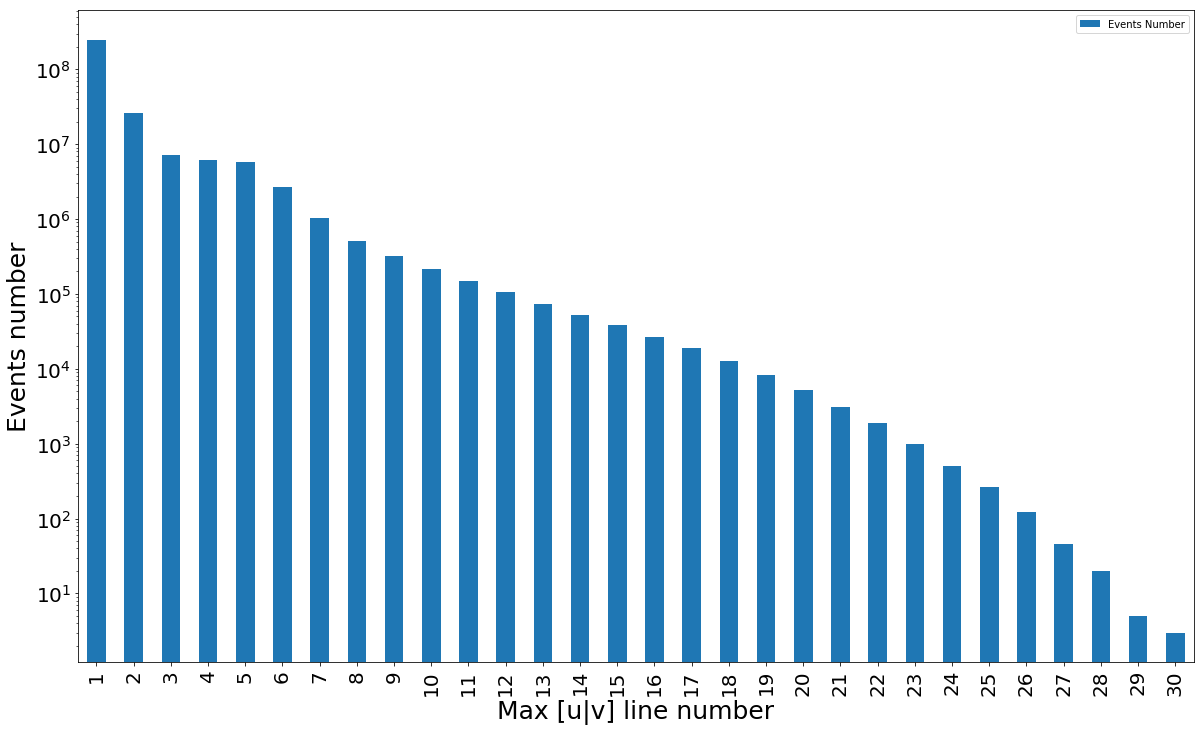

In [128]:
_1_max_line_df = get_df_to_plot_1_max_line()
ax = _1_max_line_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20) # title='Events with given max [u|v] lines number in any hit Roman Pot'
ax.title.set_size(25)
ax.set
plt.xlabel('Max [u|v] line number', fontsize=25)
plt.ylabel('Events number', fontsize=25)
fig = ax.get_figure()

fig_filename = store_base + 'chart_1_max_line_df' + '.png'
fig.savefig(fig_filename)

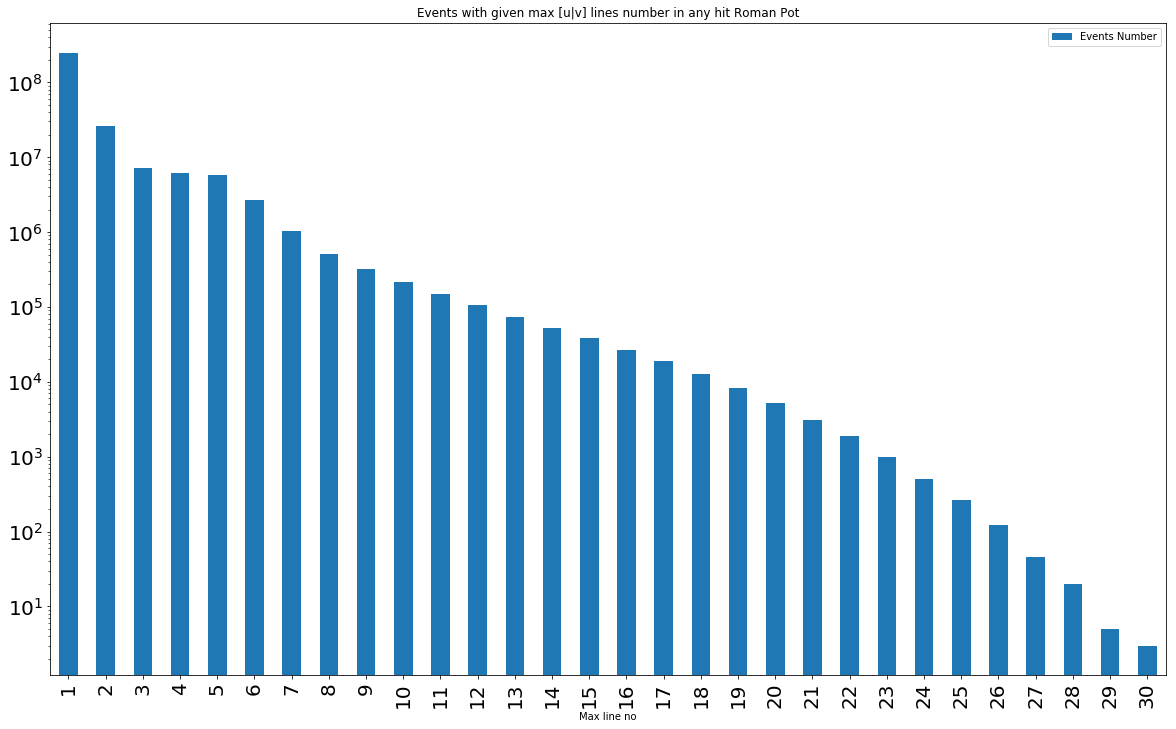

In [4]:
_1_max_line_df = get_df_to_plot_1_max_line()
_1_max_line_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='Events with given max [u|v] lines number in any hit Roman Pot')

### 2_max_line_df 

In [113]:
def get_df_to_plot_2_max_line(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_2_max_line_df.csv".format(FILL, RUN))
    df = df[['Max line no', 'Groups Number']]
    
    
    # Only to rename index
    df['Max [u|v] line number'] = df['Max line no']
    df = df[['Max [u|v] line number', 'Groups Number']]
    df = df.set_index('Max [u|v] line number')
    return df

In [115]:
_2_max_line_df = get_df_to_plot_2_max_line()
print_event_percent_df(_2_max_line_df, 3, agg_column_name='Groups Number', potential_tracks=True)

Total events number: 639039105
Potential track sum: 677943894
                       Groups Number  Percent  MaxUV    PTracks  PT percent
Max [u|v] line number                                                      
1                            568.324   88.934      1  568323554      83.830
2                             36.159    5.658      2   72318064      10.667
3                             12.434    1.946      3   37302276       5.502
4	22122427	3.4618268001


,Groups Number,Percent,MaxUV,PTracks,PT percent
Max [u|v] line number,,,,,
1,568.323554,88.934081,1,568323554,83.830470
2,36.159032,5.658344,2,72318064,10.667264
3,12.434092,1.945748,3,37302276,5.502266


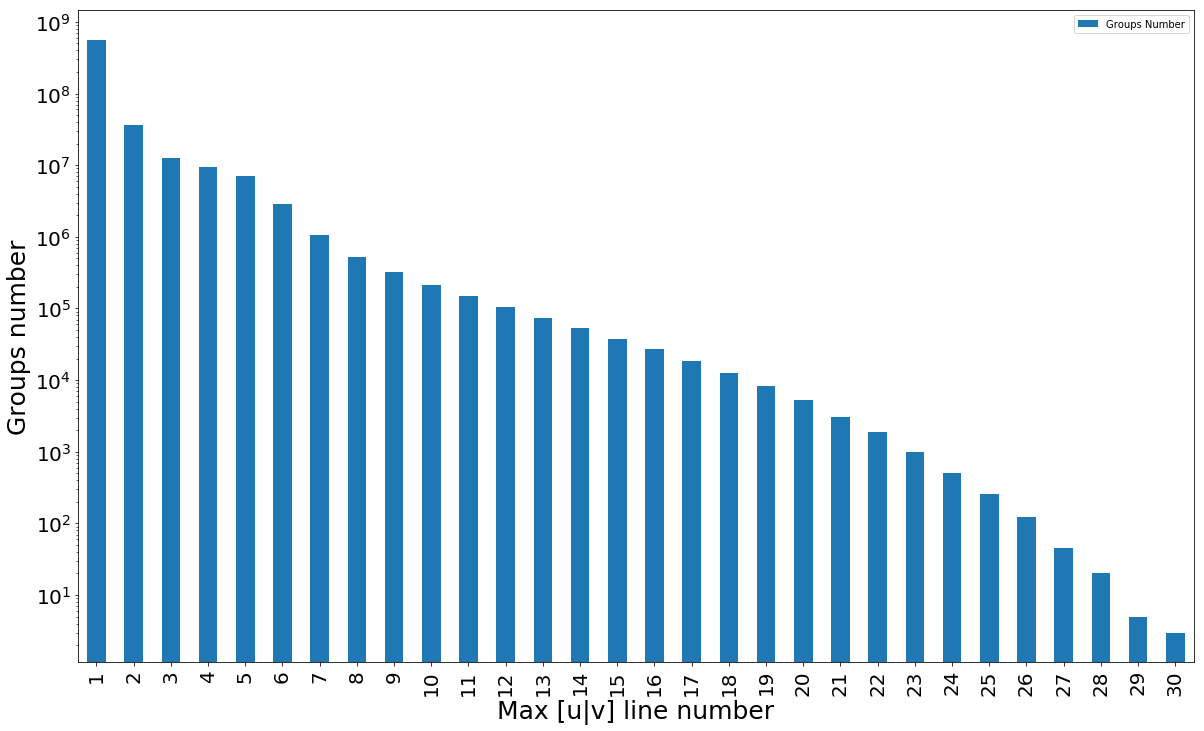

In [127]:
# _1_max_line_df = get_df_to_plot_1_max_line()
# fig = _1_max_line_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='Events with given max [u|v] lines number in any hit Roman Pot').get_figure()

_2_max_line_df = get_df_to_plot_2_max_line()
ax = _2_max_line_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20) # title='RP Groups number for given max [u|v] lines number in any hit Roman Pot'

ax.title.set_size(25)
ax.set
plt.xlabel('Max [u|v] line number', fontsize=25)
plt.ylabel('Groups number', fontsize=25)
fig = ax.get_figure()


fig_filename = store_base + 'chart_2_max_line_df' + '.png'
fig.savefig(fig_filename)

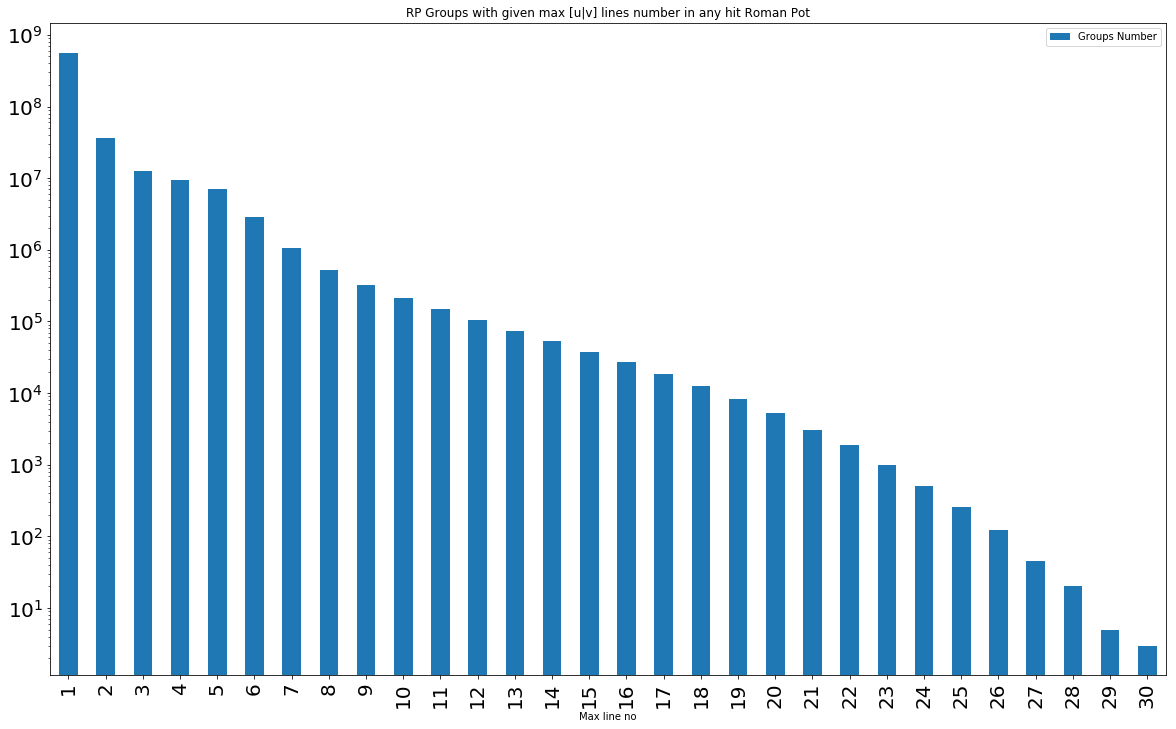

In [6]:
_2_max_line_df = get_df_to_plot_2_max_line()
_2_max_line_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='RP Groups with given max [u|v] lines number in any hit Roman Pot')

# 3 RP HIT PER EVENT 

## HELPERS 

In [159]:
def add_percent(df, agg_column):
    df = df.copy()
    agg_sum = df[agg_column].sum()
    df['Percent'] = df[agg_column] / agg_sum * 100
    return df

## PLOTS 

### 3_left_rp_hit_df 

In [15]:
def get_df_to_plot_3_left_rp_hit():
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_3_left_rp_hit_df.csv".format(FILL, RUN))
    df = df[['Hit RP', 'Events Number']]
    df = df.set_index('Hit RP')
    return df

In [38]:
df = add_percent(_3_left_rp_hit_df, 'Events Number')
df.round(3)

,Events Number,Percent
Hit RP,,
1,7827274,2.626
2,7808354,2.620
3,273060283,91.606
4,4441611,1.490
5,2360896,0.792
6,2074545,0.696
7,328093,0.110
8,145052,0.049
9,35512,0.012


In [32]:
_3_left_rp_hit_df

,Events Number
Hit RP,
1,7827274
2,7808354
3,273060283
4,4441611
5,2360896
6,2074545
7,328093
8,145052
9,35512


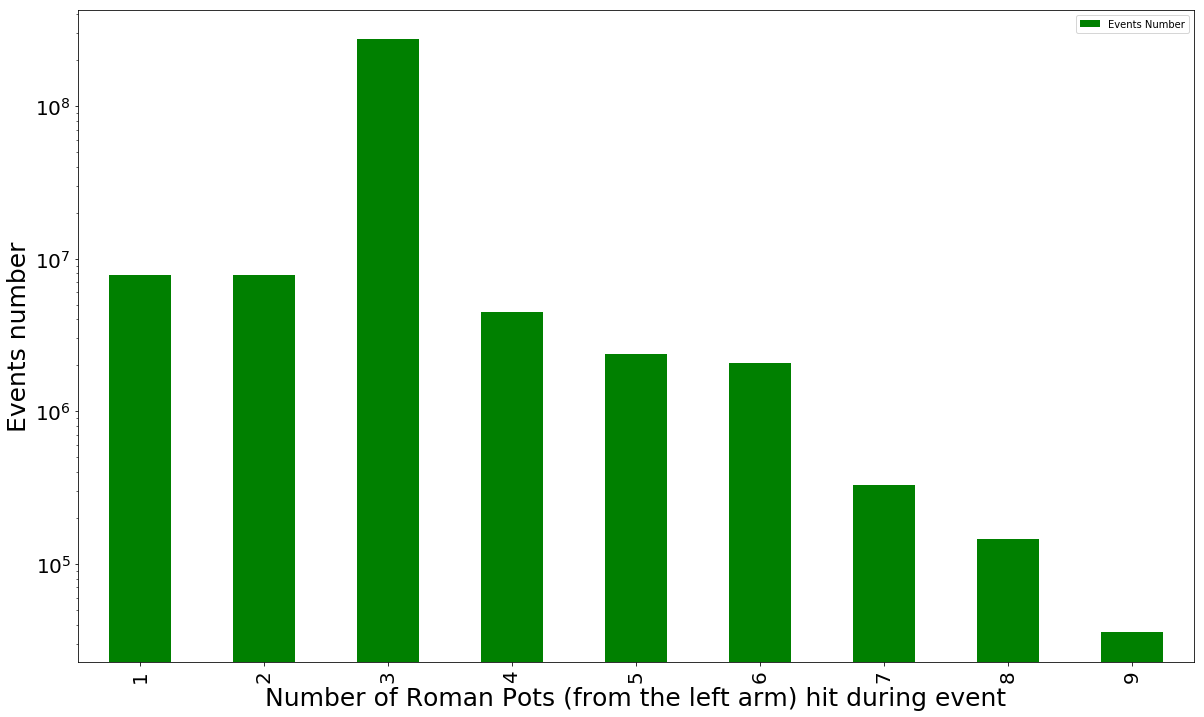

In [31]:
# _2_max_line_df = get_df_to_plot_2_max_line()
# fig = _2_max_line_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='RP Groups with given max [u|v] lines number in any hit Roman Pot').get_figure()


_3_left_rp_hit_df = get_df_to_plot_3_left_rp_hit()
ax = _3_left_rp_hit_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, color=[['g'] * len(_3_right_rp_hit_df)])#title='Number of events for given number of RP hit on the left arm').get_figure()


ax.title.set_size(25)
ax.set
plt.xlabel('Number of Roman Pots (from the left arm) hit during event', fontsize=25)
plt.ylabel('Events number', fontsize=25)
fig = ax.get_figure()


fig_filename = store_base + '_3_left_rp_hit_df' + '.png'
fig.savefig(fig_filename)

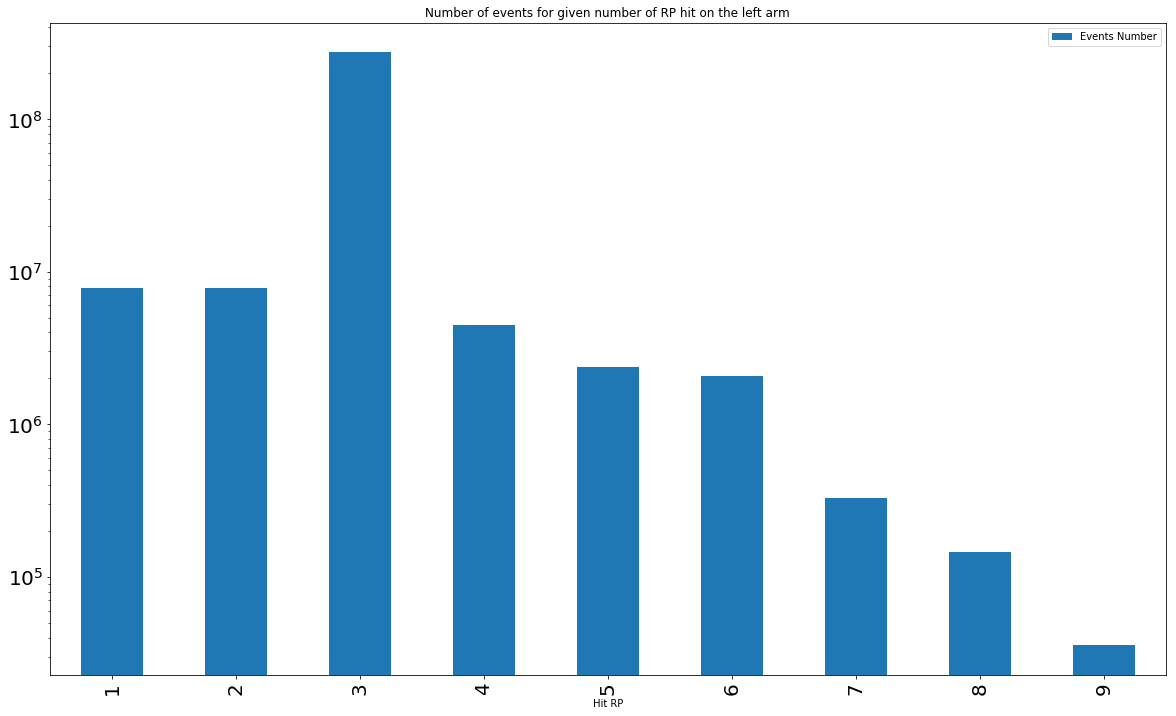

In [8]:
_3_left_rp_hit_df = get_df_to_plot_3_left_rp_hit()
_3_left_rp_hit_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='Number of events for given number of RP hit on the left arm')

### 3_right_rp_hit_df 

In [4]:
def get_df_to_plot_3_right_rp_hit(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_3_right_rp_hit_df.csv".format(FILL, RUN))
    df = df[['Hit RP', 'Events Number']]
    df = df.set_index('Hit RP')
    return df

In [40]:
df = add_percent(_3_right_rp_hit_df, 'Events Number')
df.round(3)

,Events Number,Percent
Hit RP,,
1,9239654,3.100
2,47481515,15.928
3,231584522,77.688
4,4487331,1.505
5,2769238,0.929
6,2040516,0.685
7,332129,0.111
8,129857,0.044
9,31222,0.010


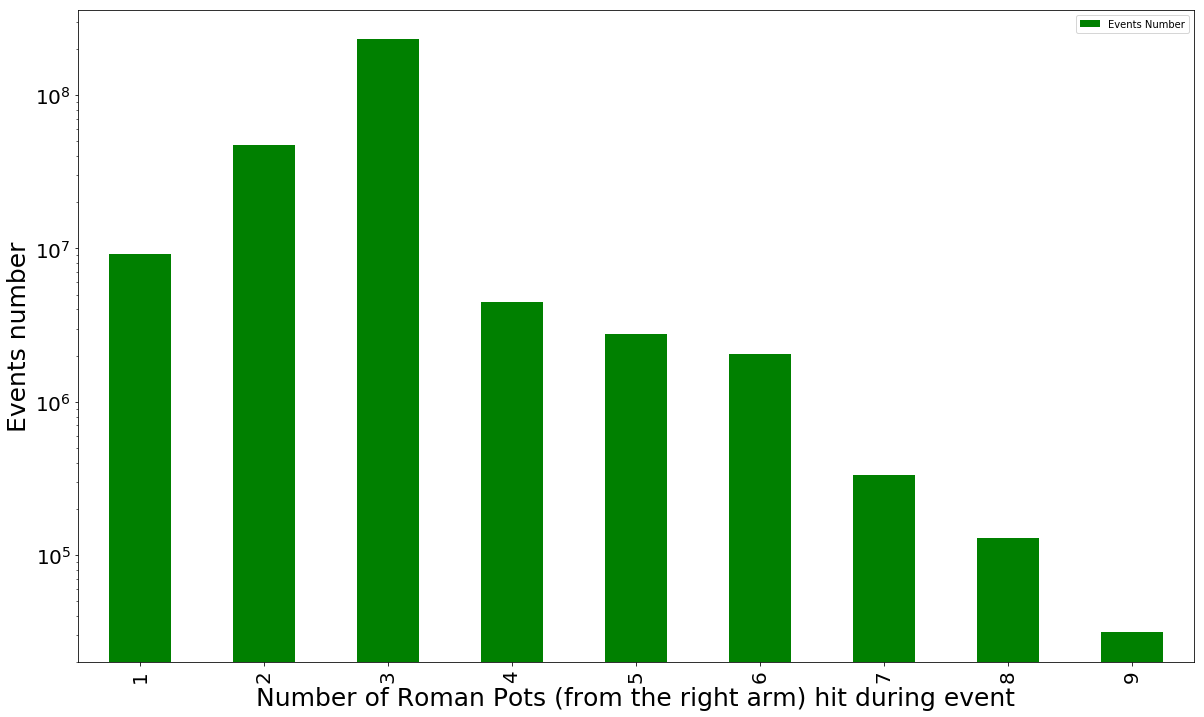

In [29]:
# _3_left_rp_hit_df = get_df_to_plot_3_left_rp_hit()
# fig = _3_left_rp_hit_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='Number of events for given number of RP hit on the left arm').get_figure()


_3_right_rp_hit_df = get_df_to_plot_3_right_rp_hit()
ax = _3_right_rp_hit_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, color=[['g'] * len(_3_right_rp_hit_df)]) #, title='Number of events for given number of RP hit on the right arm')

ax.title.set_size(25)
ax.set
plt.xlabel('Number of Roman Pots (from the right arm) hit during event', fontsize=25)
plt.ylabel('Events number', fontsize=25)
fig = ax.get_figure()

fig_filename = store_base + '_3_right_rp_hit_df' + '.png'
fig.savefig(fig_filename)

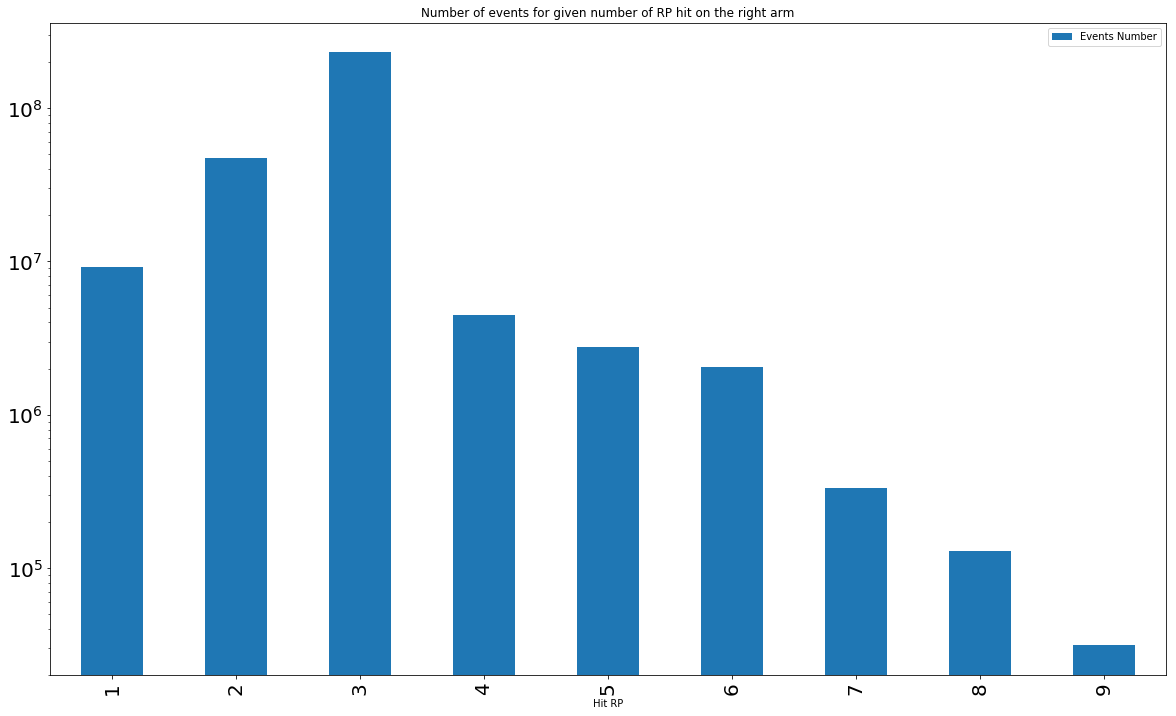

In [10]:
_3_right_rp_hit_df = get_df_to_plot_3_right_rp_hit()
_3_right_rp_hit_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='Number of events for given number of RP hit on the right arm')

### 3_rp_hit_during_event_df 

In [12]:
def get_df_to_plot_3_rp_hit_during_event(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_3_rp_hit_during_event_df.csv".format(FILL, RUN))
    df = df[['Hit RP', 'Events Number']]
    df = df.set_index('Hit RP')
    return df

In [41]:
df = add_percent(_3_rp_hit_during_event_df, 'Events Number')
df.round(3)

,Events Number,Percent
Hit RP,,
1,677924,0.226
2,2006762,0.668
3,6585118,2.191
4,12232495,4.069
5,45264755,15.058
6,217668425,72.409
7,7478153,2.488
8,4262155,1.418
9,2864250,0.953


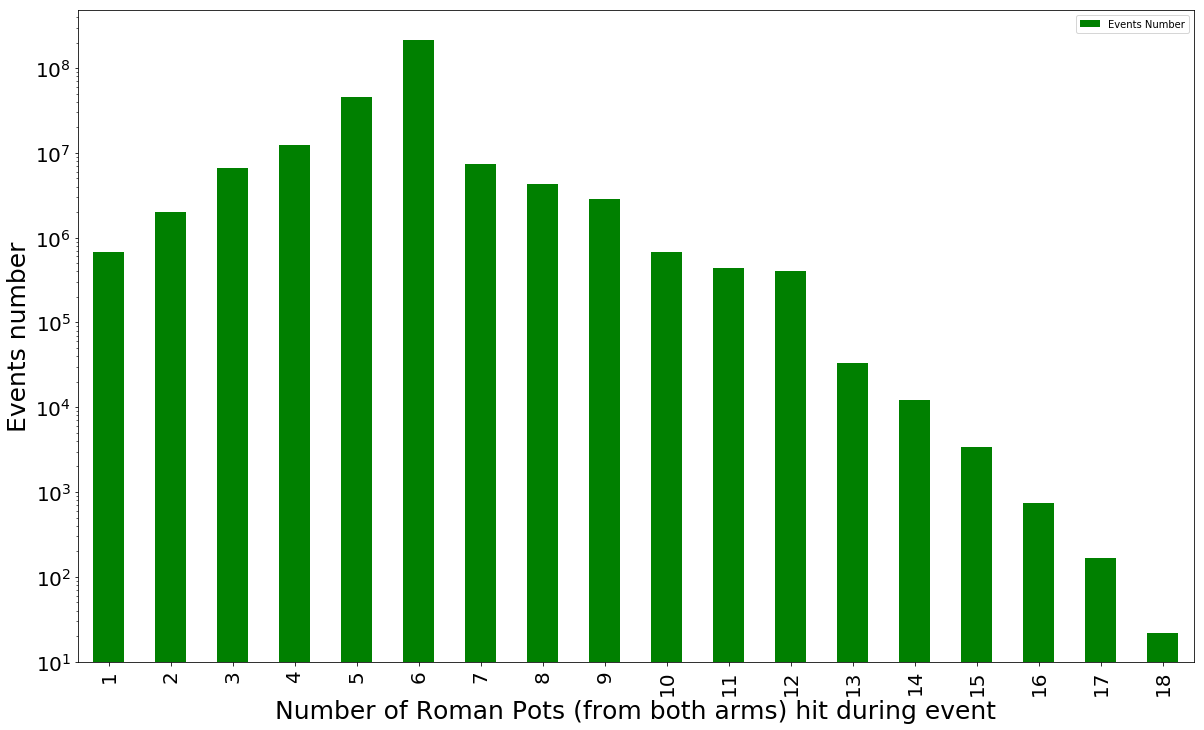

In [30]:
_3_rp_hit_during_event_df = get_df_to_plot_3_rp_hit_during_event()
ax = _3_rp_hit_during_event_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, color=[['g'] * len(_3_right_rp_hit_df)])#title='Number of events for given number of RP hit on both arms')


ax.title.set_size(25)
ax.set
plt.xlabel('Number of Roman Pots (from both arms) hit during event', fontsize=25)
plt.ylabel('Events number', fontsize=25)
fig = ax.get_figure()


fig_filename = store_base + '_3_all_rp_hit_df' + '.png'
fig.savefig(fig_filename)

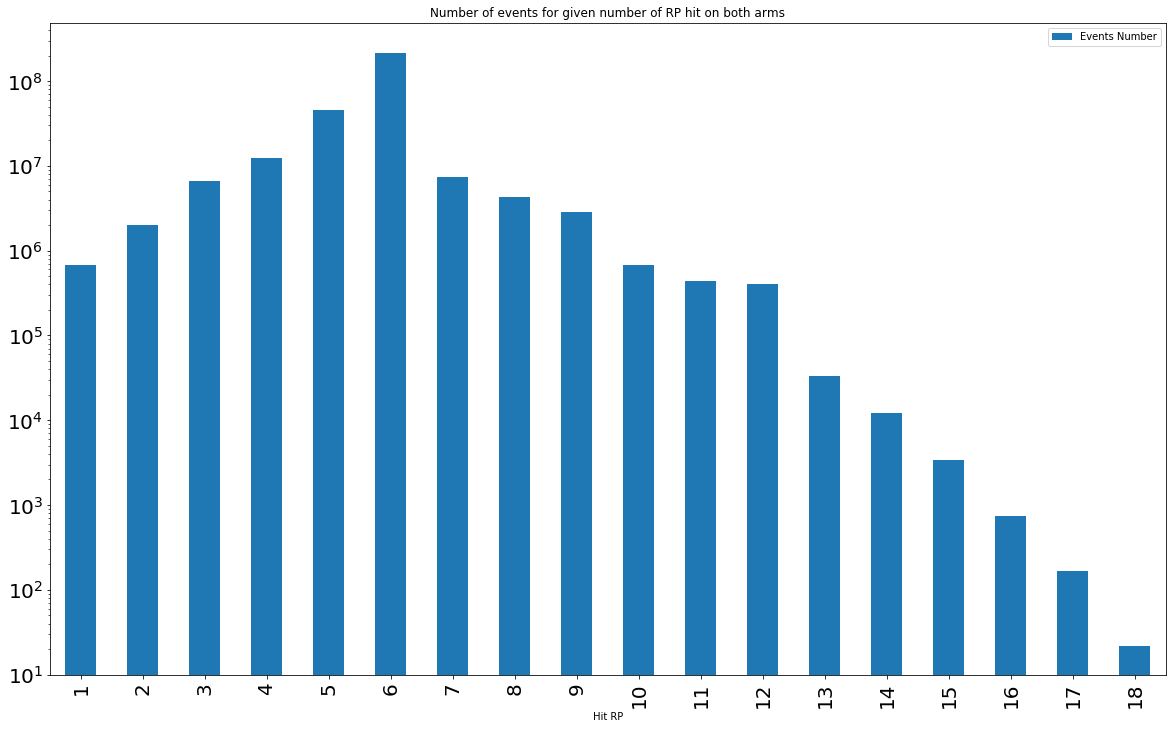

In [12]:
_3_rp_hit_during_event_df = get_df_to_plot_3_rp_hit_during_event()
_3_rp_hit_during_event_df.plot(kind='bar', figsize=(20, 12), logy=True, fontsize=20, title='Number of events for given number of RP hit on both arms')

### 3 RP GEOMETRY

In [6]:
geom_file_base = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/data/'

In [7]:
GEOM_AVG_CSV = geom_file_base + 'geom/4499/2015_10_15_fill4499_avg_by_rp_direction.csv'
GEOM_RP_CSV = geom_file_base + 'geom/4499/2015_10_15_fill4499_rps.csv'
GEOM_SENSORS_CSV = geom_file_base + 'geom/4499/2015_10_15_fill4499_sensors.csv'

In [8]:
GEOM_AVG_DF = pd.read_csv(GEOM_AVG_CSV)
GEOM_RP_DF = pd.read_csv(GEOM_RP_CSV)
GEOM_SENSORS_DF = pd.read_csv(GEOM_SENSORS_CSV)

In [9]:
np.sqrt(2.0)

1.4142135623730951

In [10]:
DET_A = 36.07
DET_E = 22.276
CENTER_TO_EDGE = 0.5 * DET_E + (DET_A / 2.0 - DET_E / np.sqrt(2.0)) * np.sqrt(2.0)
CENTER_TO_EDGE

14.367341597398772

In [11]:
def get_avg_center_distance(row):
    rpID = row['rpId']
    rpId_mod10 = int(rpID) % 10 
    if rpId_mod10 == 2 or rpId_mod10 == 3:
        return row['x_mean']
    else:
        return row['y_mean']
    
def get_avg_edge_distance(row):
    avg_center_dist = row['avg_center_dist']
    
    if avg_center_dist < 0.0:
        return avg_center_dist + CENTER_TO_EDGE
    else:
        return avg_center_dist - CENTER_TO_EDGE

In [12]:
AVG_OF_AVG_DF = GEOM_AVG_DF.groupby('rpId') \
       .agg({'x':'mean', 'y':'mean'}) \
       .rename(columns={'x':'x_mean','y':'y_mean'}) \
       .reset_index()
AVG_OF_AVG_DF['avg_center_dist'] = AVG_OF_AVG_DF.apply(lambda x: get_avg_center_distance(x), axis=1)
AVG_OF_AVG_DF['avg_edge_dist'] = AVG_OF_AVG_DF.apply(lambda x: get_avg_edge_distance(x), axis=1)
AVG_OF_AVG_DF

,rpId,y_mean,x_mean,avg_center_dist,avg_edge_dist
0,0,56.004400,0.000000,56.00440,41.637058
1,1,-56.353400,0.000000,-56.35340,-41.986058
2,2,0.000000,57.140400,57.14040,42.773058
3,3,3.435177,21.722390,21.72239,7.355048
4,4,19.826030,-2.913071,19.82603,5.458688
5,5,-20.096670,3.089629,-20.09667,-5.729328
6,20,20.387030,-0.520410,20.38703,6.019688
7,21,-20.536350,-0.341510,-20.53635,-6.169008
8,22,1.146189,21.715530,21.71553,7.348188
9,23,0.282748,21.239710,21.23971,6.872368


In [101]:
horizontal_rp_last_digits = [2, 3]

def get_pairs_df(horizontal=False):
    right_geom_df =  GEOM_RP_DF.sort_values(by=['z'], ascending=False).reset_index()[:9]
    
    rp_pairs = []
    left_distances = []
    right_distances = []
    
    for idx, row in right_geom_df.iterrows():
        rp_right = int(row['rpID'])
        rp_left = rp_right - 100
        rp_z = row['z']
        
        if horizontal == True and rp_right%10 not in horizontal_rp_last_digits:
            continue
        elif horizontal == False and rp_right%10 in horizontal_rp_last_digits:
            continue
        
        rp_pair = '(RP_{}, RP_{}) at z = [-/+]{}'.format(rp_left, rp_right, rp_z)
        left_distance = AVG_OF_AVG_DF.loc[AVG_OF_AVG_DF['rpId'] == rp_left].iloc[0]['avg_edge_dist']
        right_distance = AVG_OF_AVG_DF.loc[AVG_OF_AVG_DF['rpId'] == rp_right].iloc[0]['avg_edge_dist']
        
        rp_pairs.append(rp_pair)
        left_distances.append(left_distance)
        right_distances.append(right_distance)
    
    pairs_df = pd.DataFrame({'RP pairs': np.array(rp_pairs), 
                             'RP left' : np.array(left_distances), 
                             'RP right' : np.array(right_distances)})
    return pairs_df

In [140]:
def plot_pairs(horizontal=False):
    pairs_df = get_pairs_df(horizontal=horizontal)
    
    my_range=range(1,len(pairs_df.index)+1)

#     if horizontal:
#         fig = plt.figure(figsize=(12,3))
#     else:
#         fig = plt.figure(figsize=(12,3))
    
    fig = plt.figure(figsize=(12,3), dpi=150)
    
    plt.hlines(y=my_range, xmin=pairs_df['RP left'], xmax=pairs_df['RP right'], color='grey', alpha=0.4)
    plt.scatter(pairs_df['RP left'], my_range, color='skyblue', alpha=1, label='RP left')
    plt.scatter(pairs_df['RP right'], my_range, color='green', alpha=0.4 , label='RP right')
    plt.legend(fontsize=15)

    plt.xticks(fontsize=15)
    plt.yticks(my_range, pairs_df['RP pairs'], fontsize=15)
#     plt.title("Comparison of silicon edges distance between RP from left and right arm", loc='left')

    plt.xlabel('Max [u|v] line number', fontsize=25)
    plt.ylabel('Groups number', fontsize=25)
    
    if horizontal:
        plt.xlabel('Detector edge x coordinate [mm]', fontsize=25)
        fig_filename = store_base + '_3_hor_dists' + '.png'
    else:
        plt.xlabel('Detector edge y coordinate [mm]', fontsize=25)
        fig_filename = store_base + '_3_ver_dists' + '.png'
    plt.ylabel('RP pairs')
    
    plt.tight_layout()
    fig.savefig(fig_filename)

#     fig.savefig("plot.png")



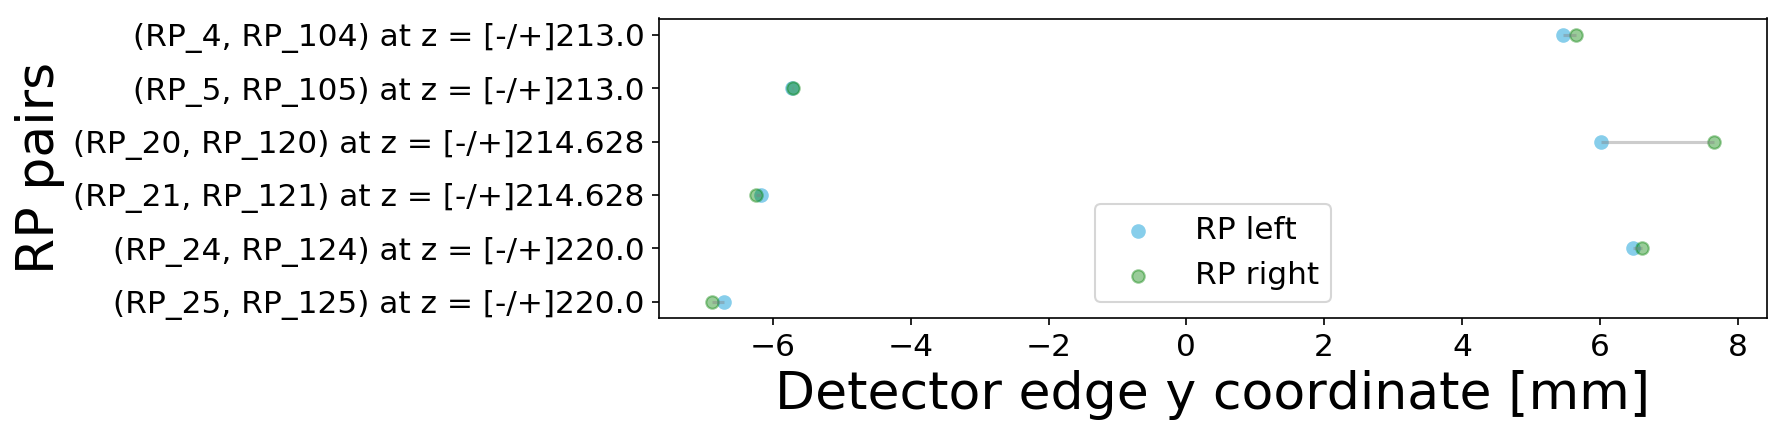

In [147]:
plot_pairs(horizontal=False)

In [144]:
def add_abs_diff_col(df):
    df['abs_diff'] = df.apply(lambda row: abs(row['RP left'] - row['RP right']), axis=1)
    return df

In [148]:
df = get_pairs_df(horizontal=True)
df = add_abs_diff_col(df)
df

,RP left,RP pairs,RP right,abs_diff
0,6.872368,"(RP_23, RP_123) at z = [-/+]219.55",6.707658,0.16471
1,7.348188,"(RP_22, RP_122) at z = [-/+]215.078",7.418578,0.07039
2,7.355048,"(RP_3, RP_103) at z = [-/+]212.55",7.568818,0.21377


### 4_groups_occurance_df  --> MAKE IT PERCENTS

In [153]:
def get_df_to_plot_4_groups_occurance(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_4_groups_occurance_df.csv".format(FILL, RUN))
    df = df[['Group', 'in_events']]
    df = df.set_index('Group')
    return df

In [160]:
_4_groups_occurance_df = get_df_to_plot_4_groups_occurance()[1:]
df = add_percent(_4_groups_occurance_df, 'in_events')
df

,in_events,Percent
Group,,
1,153332529,23.994233
2,153666586,24.046507
3,12242358,1.915745
4,156833360,24.542060
5,150851189,23.605940
6,12113082,1.895515


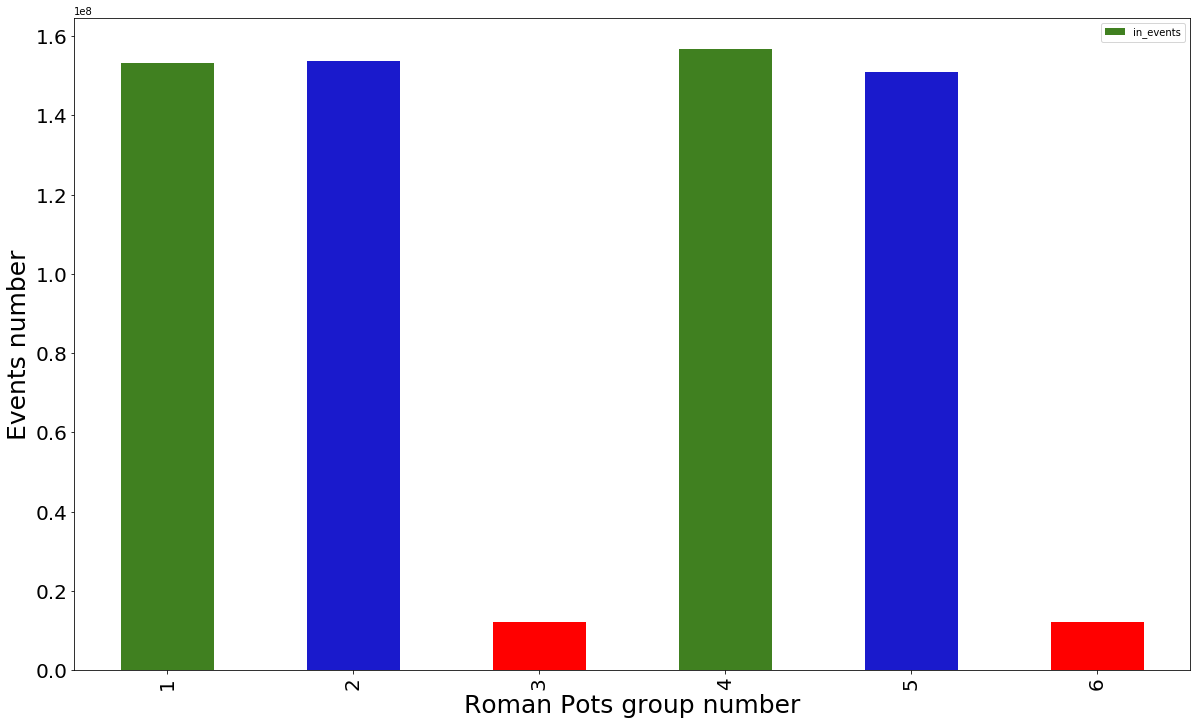

In [165]:
# cm = ['r','b','g']
cm = [[1, 0, 0, 1],
      [0.25, 0.5, 0.125, 1],
      [0.1, 0.1, 0.8, 1],
      [1, 0, 0, 1],
      [0.25, 0.5, 0.125, 1],
      [0.1, 0.1, 0.8, 1]]

#     1: "L-TOP",
#     2: "L-BOT",
#     3: "L-HOR",
#     4: "R-TOP",
#     5: "R-BOT",
#     6: "R-HOR"

_4_groups_occurance_df = get_df_to_plot_4_groups_occurance()
_4_groups_occurance_df = _4_groups_occurance_df.drop(index=0)
ax = _4_groups_occurance_df.plot(kind='bar', figsize=(20, 12), color=[[cm[i] for i in _4_groups_occurance_df.index.values%6]],
                            logy=False, fontsize=20)#, title='Number of events where given RP group was hit').get_figure()


ax.title.set_size(25)
ax.set
plt.xlabel('Roman Pots group number', fontsize=25)
plt.ylabel('Events number', fontsize=25)
fig = ax.get_figure()


fig_filename = store_base + '_4_groups_occurance_df' + '.png'
fig.savefig(fig_filename)

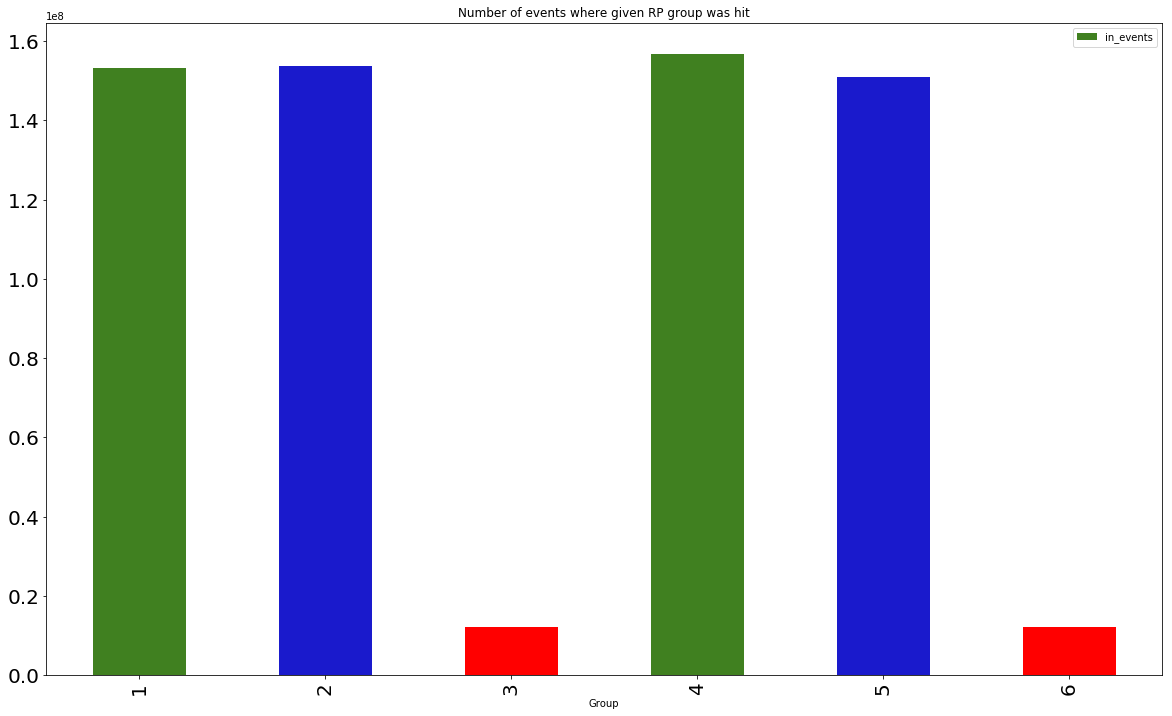

In [14]:
# cm = ['r','b','g']
cm = [[1, 0, 0, 1],
      [0.25, 0.5, 0.125, 1],
      [0.1, 0.1, 0.8, 1],
      [1, 0, 0, 1],
      [0.25, 0.5, 0.125, 1],
      [0.1, 0.1, 0.8, 1]]

#     1: "L-TOP",
#     2: "L-BOT",
#     3: "L-HOR",
#     4: "R-TOP",
#     5: "R-BOT",
#     6: "R-HOR"

_4_groups_occurance_df = get_df_to_plot_4_groups_occurance()
_4_groups_occurance_df = _4_groups_occurance_df.drop(index=0)
_4_groups_occurance_df.plot(kind='bar', figsize=(20, 12), color=[[cm[i] for i in _4_groups_occurance_df.index.values%6]],
                            logy=False, fontsize=20, title='Number of events where given RP group was hit')

In [124]:
reshaped = np.array(range(24)).reshape((4,6))
print(reshaped)
reshaped[:3,:2]


[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [123]:
mask = np.full((4,6), False)
mask

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [11]:
u_line_max = 7
v_line_max = 7
lines_arr = np.array
lines_arr = np.ones((u_line_max + 1, v_line_max + 1)) / 1000
lines_arr

array([[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]])

In [67]:
2.0 * 10**9

2000000000.0

In [122]:
x = np.ones(6).reshape(2, 3)
print(x[0][1])
x[0][1] = 0.001
print(x)
np.putmask(x, x < 1.0, False)
np.putmask(x, x > 0.0, True)
x

1.0
[[1.    0.001 1.   ]
 [1.    1.    1.   ]]


array([[1., 0., 1.],
       [1., 1., 1.]])

In [ ]:
lines_arr = np.ones((u_line_max + 1, v_line_max + 1)) / 1000

In [224]:
def prepare_sns_plt_show_uv_lines(csv_filename, apply_cut=False, rows=9, cols=9, figsize=(12,12)): 
    df = pd.read_csv(csv_filename)
    
    df = df[['uLineSize', 'vLineSize', 'count']]
    u_line_max = df['uLineSize'].max()
    v_line_max = df['vLineSize'].max()

    mask      = np.full((u_line_max + 1,  v_line_max + 1), True)
    lines_arr = np.ones((u_line_max + 1, v_line_max + 1)) / 1000

    for index, row in df.iterrows():
        u_line_size = int(row['uLineSize'])
        v_line_size = int(row['vLineSize'])
        count = int(row['count'])
        lines_arr[u_line_size][v_line_size] = count
        
        mask[u_line_size][v_line_size] = False # If there is some value it will be positive (if there were zero it would be obsolete)
             
    if apply_cut:
        lines_arr = lines_arr[:rows,:cols] 
        
        # THIS LOOPS ARE TO DRAW HEATMAP PROPPERLY (WE CANNOT HAVE VALUES LOWER THAN 1)
        for row in range(rows):
            for col in range(cols):
                if lines_arr[row][col] == 0.001:
                    lines_arr[row][col] = 100
        
        mask = mask[:rows,:cols]
        
    df = pd.DataFrame(lines_arr)
    
    fig, ax = plt.subplots(figsize=figsize, dpi=100)         # Sample figsize in inches
    return sns.heatmap(df, 
                robust=True,
                annot=True, 
#                 fmt=".1f",
                cmap=plt.cm.jet,
                mask=mask,
                center=2*10**6,
                norm=LogNorm(vmin=0, vmax=16000000000),
                annot_kws={"size": 10})

### 5_horizontal_uv_lines_df 

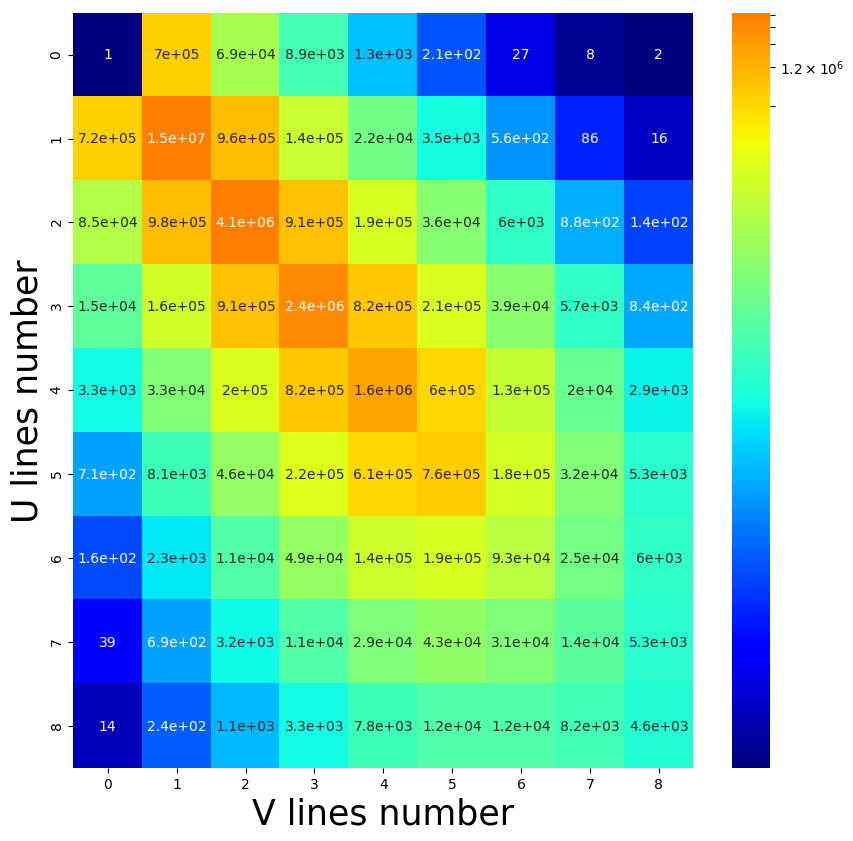

In [233]:
ax = prepare_sns_plt_show_uv_lines("results/{0}/{1}/{0}_{1}_5_horizontal_uv_lines_df.csv".format(FILL, RUN), 
                              apply_cut=True, figsize=(10,10))

ax.set
plt.xlabel('V lines number', fontsize=25)
plt.ylabel('U lines number', fontsize=25)
fig = ax.get_figure()

fig_filename = store_base + '_5_horizontal_uv_lines_df' + '.png'
fig.savefig(fig_filename)


### 5_vertical_uv_lines_df 

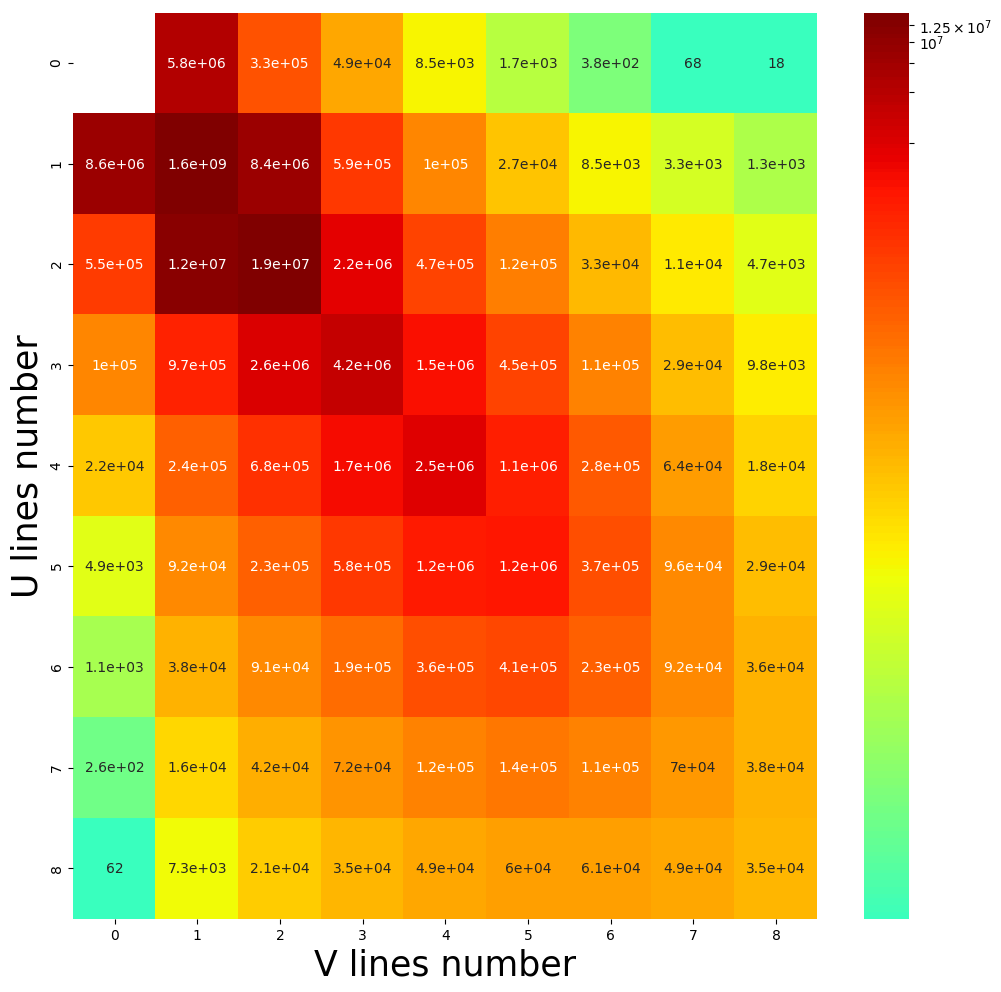

In [231]:
ax = prepare_sns_plt_show_uv_lines("results/{0}/{1}/{0}_{1}_5_vertical_uv_lines_df.csv".format(FILL, RUN),
                             apply_cut=True)

ax.set
plt.xlabel('V lines number', fontsize=25)
plt.ylabel('U lines number', fontsize=25)
fig = ax.get_figure()

fig_filename = store_base + '_5_vertical_uv_lines_df' + '.png'
fig.savefig(fig_filename)

### 5_uv_lines_df 

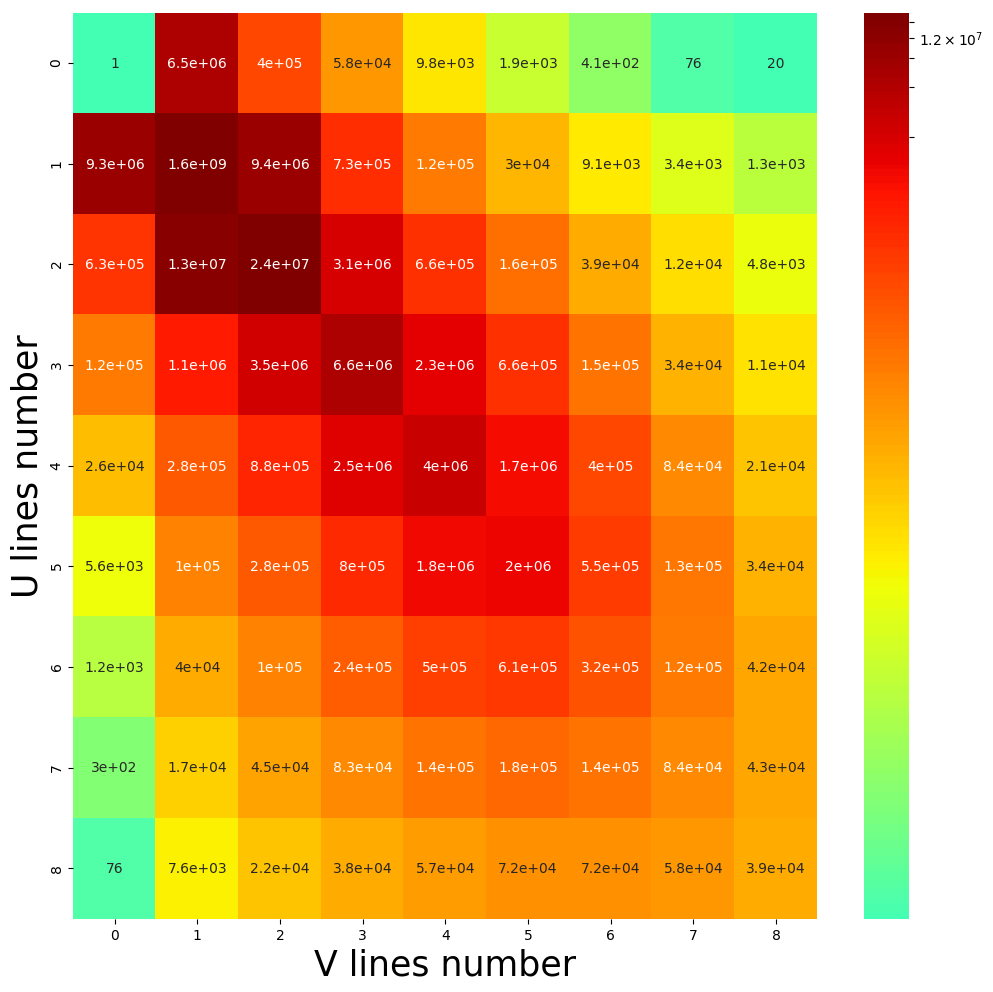

In [232]:
ax = prepare_sns_plt_show_uv_lines("results/{0}/{1}/{0}_{1}_5_uv_lines_df.csv".format(FILL, RUN),
                             apply_cut=True)

ax.set
plt.xlabel('V lines number', fontsize=25)
plt.ylabel('U lines number', fontsize=25)
fig = ax.get_figure()

fig_filename = store_base + '_5_ALL_uv_lines_df' + '.png'
fig.savefig(fig_filename)

### 6_single_rp_hit_in_group_no_df  --> MAKE THESE PERCENT

In [167]:
def get_df_to_plot_6_single_rp_hit_in_group_no(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_6_single_rp_hit_in_group_no_df.csv".format(FILL, RUN))
    df = df[['RP hit', 'Groups number']]
    df['Hit RP'] = df['RP hit']
    df['Events Number'] = df['Groups number']
    df = df[['Hit RP', 'Events Number']]
    df = df.set_index('Hit RP')
    return df

In [181]:
_6_single_rp_hit_in_group_df = get_df_to_plot_6_single_rp_hit_in_group_no()
df = add_percent(_6_single_rp_hit_in_group_df, 'Events Number')
df

,Events Number,Percent
Hit RP,,
1,30348160,5.339944
2,54549334,9.598288
3,483426060,85.061767


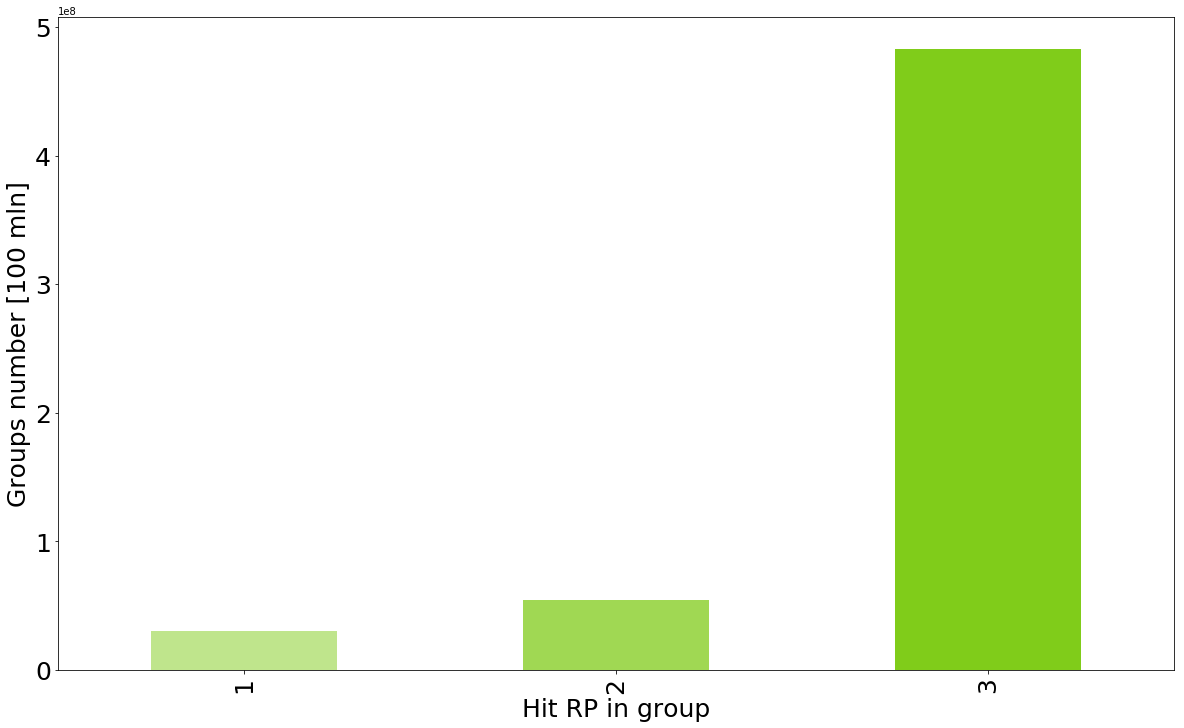

In [178]:
cm = [[0.5, 0.8, 0.1, 1],
      [0.5, 0.8, 0.1, 0.5],
      [0.5, 0.8, 0.1, 0.75]]

_6_single_rp_hit_in_group_no_df = get_df_to_plot_6_single_rp_hit_in_group_no()
ax = _6_single_rp_hit_in_group_no_df.plot(kind='bar', figsize=(20, 12), logy=False, color=[[cm[i] for i in _6_single_rp_hit_in_group_no_df.index.values%3]],
                                     fontsize=25)#, title='Number of single tracking event where given number of RP from one group was hit')


ax.title.set_size(25)
ax.set
plt.xlabel('Hit RP in group', fontsize=25)
plt.ylabel('Groups number [100 mln]', fontsize=25)
legend = plt.legend(prop={'size': 20})
legend.remove()
fig = ax.get_figure()


fig_filename = store_base + '_6_single_rp_hit_in_group_no_df' + '.png'
fig.savefig(fig_filename)

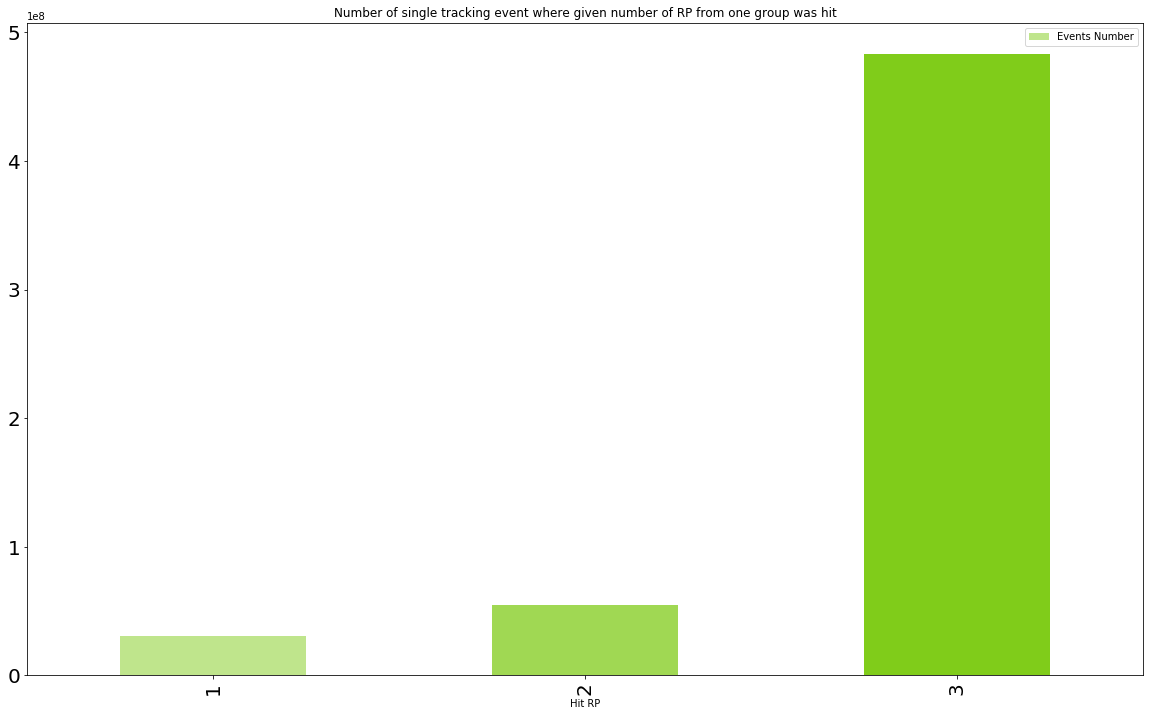

In [29]:
cm = [[0.5, 0.8, 0.1, 1],
      [0.5, 0.8, 0.1, 0.5],
      [0.5, 0.8, 0.1, 0.75]]

_6_single_rp_hit_in_group_no_df = get_df_to_plot_6_single_rp_hit_in_group_no()
_6_single_rp_hit_in_group_no_df.plot(kind='bar', figsize=(20, 12), logy=False, color=[[cm[i] for i in _6_single_rp_hit_in_group_no_df.index.values%3]],
                                     fontsize=20, title='Number of single tracking event where given number of RP from one group was hit')

### 6a_single_one_rp_hit_from_group_df  --> for each group different colour

In [183]:
def get_df_to_plot_6a_single_one_rp_hit_from_group(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_6a_single_one_rp_hit_from_group_df.csv".format(FILL, RUN))
    df = df[['groupID', 'rpID', 'Events Number']]
    df = df.set_index(['groupID', 'rpID'])
    return df

In [195]:
_6a_df = get_df_to_plot_6a_single_one_rp_hit_from_group()[1:]
_6a_df.reset_index(level=0, inplace=True)
_6a_df['count'] = _6a_df.groupby('groupID')['Events Number'].transform('sum')
_6a_df['percent'] = _6a_df.apply(lambda row: float(row['Events Number']) / row['count'] * 100, axis=1)
_6a_df

,groupID,Events Number,count,percent
rpID,,,,
4,1,1504032,5357859,28.071511
20,1,1016417,5357859,18.970581
24,1,2837410,5357859,52.957907
5,2,1567819,5943358,26.379346
21,2,763306,5943358,12.843009
25,2,3612233,5943358,60.777645
3,3,846496,3127525,27.066003
22,3,1484039,3127525,47.450908
23,3,796990,3127525,25.483090


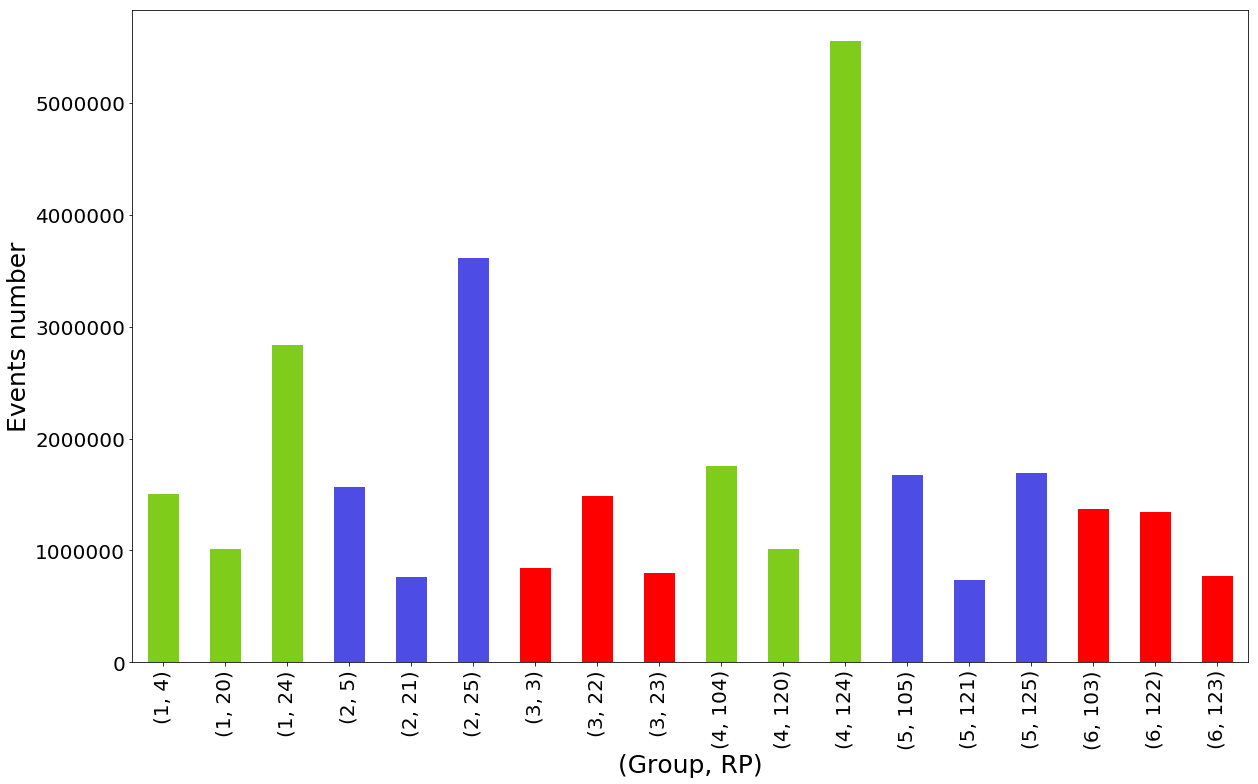

In [196]:
cm = [[1.00, 0.0, 0.0, 1],
      [0.50, 0.8, 0.1, 1],
      [0.30, 0.3, 0.9, 1]]

#     1: "L-TOP",
#     2: "L-BOT",
#     3: "L-HOR",
#     4: "R-TOP",
#     5: "R-BOT",
#     6: "R-HOR"

_6a_single_one_rp_hit_from_group_df = get_df_to_plot_6a_single_one_rp_hit_from_group()
_6a_single_one_rp_hit_from_group_df = _6a_single_one_rp_hit_from_group_df.drop(index=0)
ax = _6a_single_one_rp_hit_from_group_df.plot(kind='bar', figsize=(20, 12), logy=False,  
                                         color=[[cm[idx_pair[i]%3] for idx_pair in _6a_single_one_rp_hit_from_group_df.index.values]],
                                         fontsize=20)#, title='Single Tracking Events where only one RP from group was hit')


ax.title.set_size(25)
ax.set
plt.xlabel('(Group, RP)', fontsize=25)
plt.ylabel('Events number', fontsize=25)
legend = plt.legend(prop={'size': 20})
legend.remove()
fig = ax.get_figure()



fig_filename = store_base + '_6a_single_one_rp_hit_from_group_df' + '.png'
fig.savefig(fig_filename)

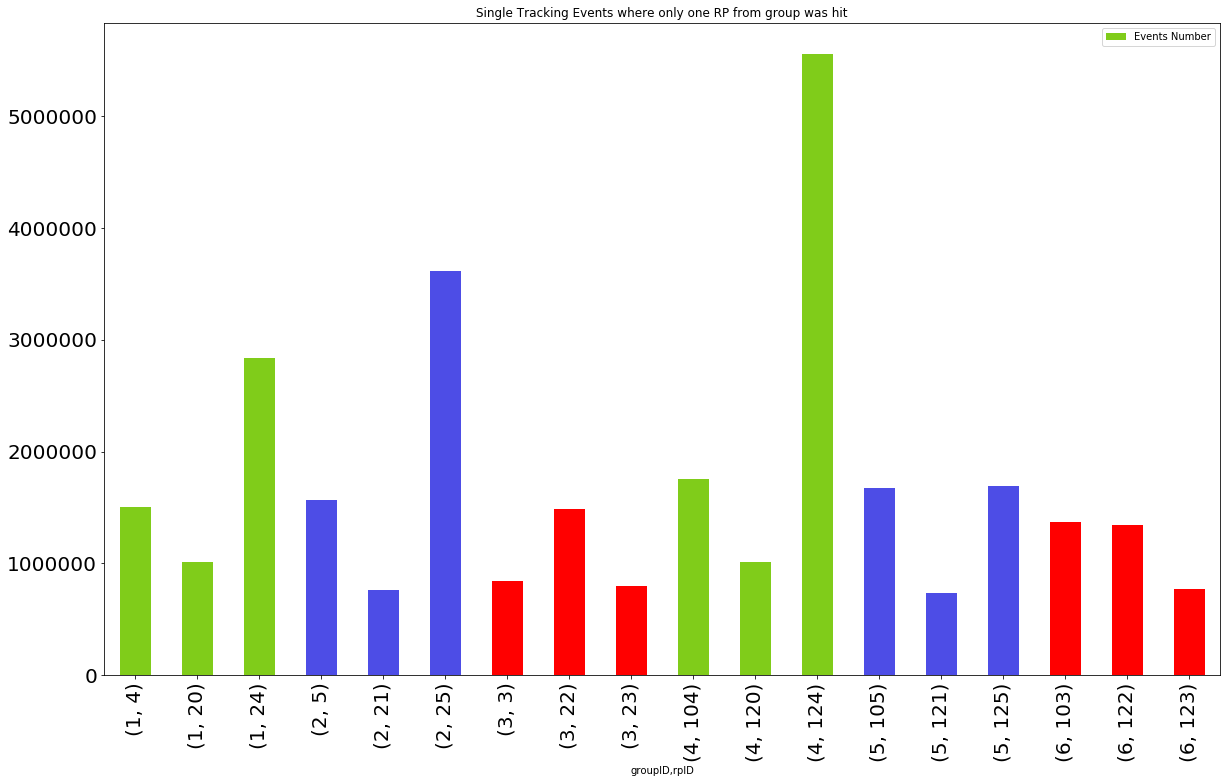

In [20]:
cm = [[1.00, 0.0, 0.0, 1],
      [0.50, 0.8, 0.1, 1],
      [0.30, 0.3, 0.9, 1]]

#     1: "L-TOP",
#     2: "L-BOT",
#     3: "L-HOR",
#     4: "R-TOP",
#     5: "R-BOT",
#     6: "R-HOR"

_6a_single_one_rp_hit_from_group_df = get_df_to_plot_6a_single_one_rp_hit_from_group()
_6a_single_one_rp_hit_from_group_df = _6a_single_one_rp_hit_from_group_df.drop(index=0)
_6a_single_one_rp_hit_from_group_df.plot(kind='bar', figsize=(20, 12), logy=False,  
                                         color=[[cm[idx_pair[i]%3] for idx_pair in _6a_single_one_rp_hit_from_group_df.index.values]],
                                         fontsize=20, title='Single Tracking Events where only one RP from group was hit')

# CHECK IF LAST RP WAS CLOSE TO BEAM

### 6b_single_missing_rp_two_rp_df 

In [21]:
def get_df_to_plot_6b_single_missing_rp_two_rp(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_6b_single_missing_rp_two_rp_df.csv".format(FILL, RUN))
    df = df[['groupID', 'rpID', 'In_Events']]
    df = df.set_index(['groupID', 'rpID'])
    df['Missed_Events'] = df['In_Events']
    df = df[['Missed_Events']]
    return df

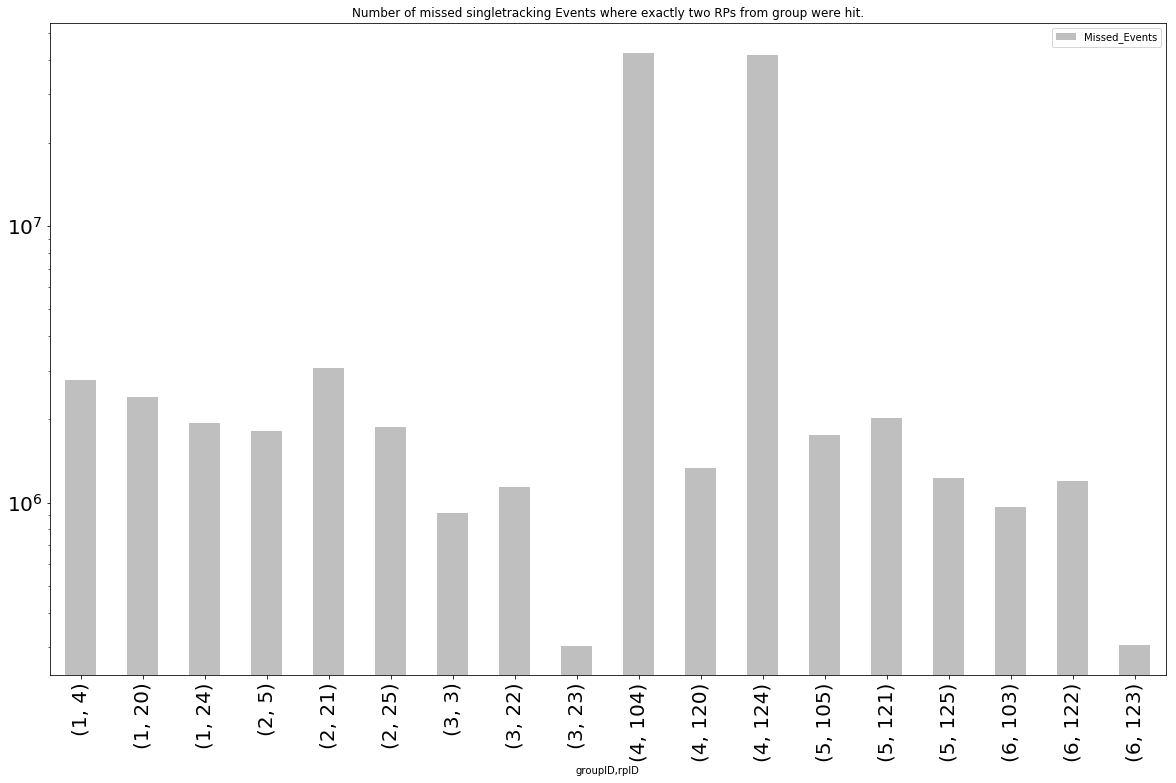

In [22]:
cm = [[0.0, 0.0, 0.0, 0.25]]

_6b_single_missing_rp_two_rp_df = get_df_to_plot_6b_single_missing_rp_two_rp()
_6b_single_missing_rp_two_rp_df.plot(kind='bar', figsize=(20, 12), logy=True, 
                                     color=[[cm[0] for i in _6b_single_missing_rp_two_rp_df.index.values]], 
                                     fontsize=20, title='Number of missed singletracking Events where exactly two RPs from group were hit.')

### 7_multi_rp_hit_in_group_no_df  --> MAKE THESE PERCENT

In [198]:
def get_df_to_plot_7_multi_rp_hit_in_group_no(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_7_multi_rp_hit_in_group_no_df.csv".format(FILL, RUN))
    df = df[['RP hit', 'Groups number']]
    df['Hit RP'] = df['RP hit']
    df['Events Number'] = df['Groups number']
    df = df[['Hit RP', 'Events Number']]
    df = df.set_index('Hit RP')
    return df

In [203]:
_7_df = get_df_to_plot_7_multi_rp_hit_in_group_no()
_7_df = add_percent(_7_df, 'Events Number')
_7_df.round(2)

,Events Number,Percent
Hit RP,,
1,25321357,35.81
2,16169630,22.87
3,29224564,41.33


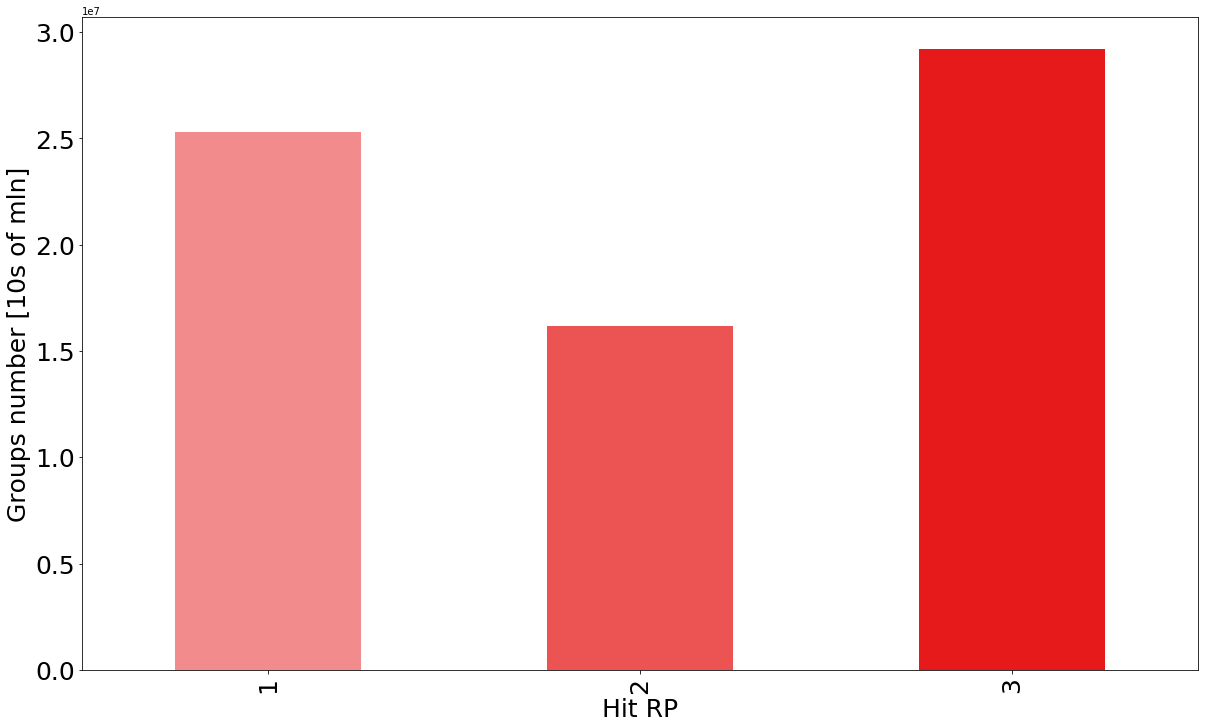

In [200]:
cm = [[0.9, 0.1, 0.1, 1],
      [0.9, 0.1, 0.1, 0.5],
      [0.9, 0.1, 0.1, 0.75]]

_7_multi_rp_hit_in_group_no_df = get_df_to_plot_7_multi_rp_hit_in_group_no()
ax = _7_multi_rp_hit_in_group_no_df.plot(kind='bar', figsize=(20, 12), logy=False, 
                                    color=[[cm[i] for i in _7_multi_rp_hit_in_group_no_df.index.values%3]],
                                    fontsize=25)#, title='Number of multi tracking event where given number of RP from one group was hit')


ax.title.set_size(25)
ax.set
plt.xlabel('Hit RP', fontsize=25)
plt.ylabel('Groups number [10s of mln]', fontsize=25)
legend = plt.legend(prop={'size': 20})
legend.remove()
fig = ax.get_figure()


fig_filename = store_base + '_7_multi_rp_hit_in_group_no_df' + '.png'
fig.savefig(fig_filename)

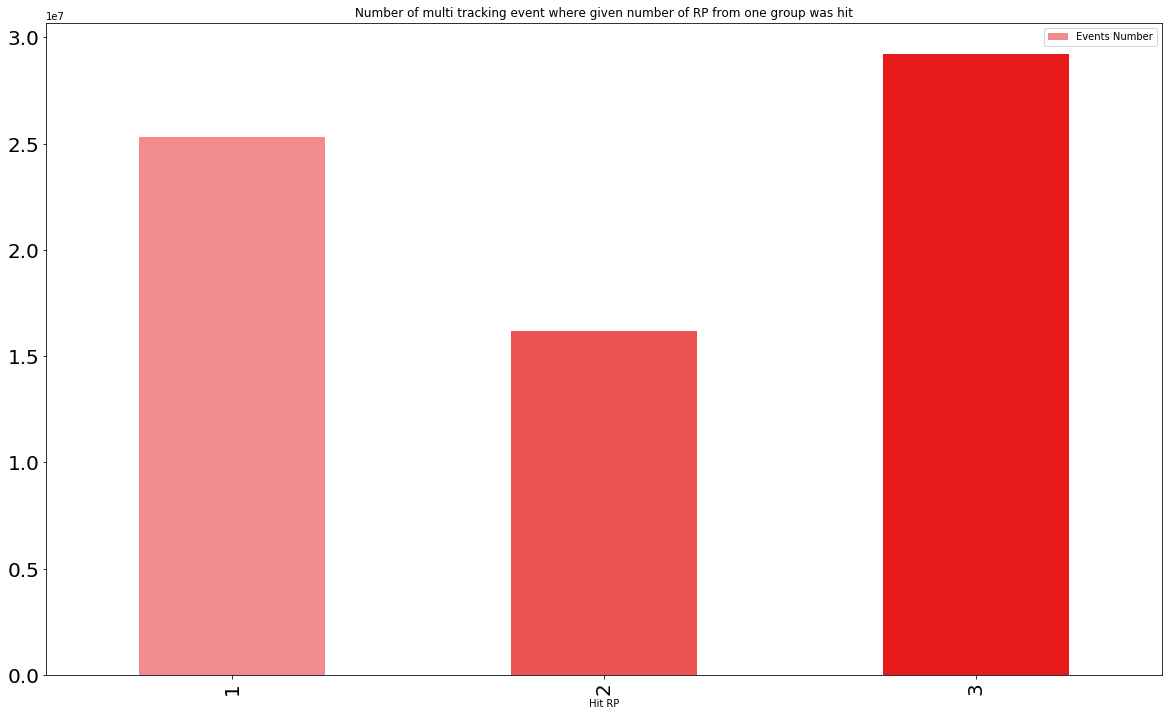

In [24]:
cm = [[0.9, 0.1, 0.1, 1],
      [0.9, 0.1, 0.1, 0.5],
      [0.9, 0.1, 0.1, 0.75]]

_7_multi_rp_hit_in_group_no_df = get_df_to_plot_7_multi_rp_hit_in_group_no()
_7_multi_rp_hit_in_group_no_df.plot(kind='bar', figsize=(20, 12), logy=False, 
                                    color=[[cm[i] for i in _7_multi_rp_hit_in_group_no_df.index.values%3]],
                                    fontsize=20, title='Number of multi tracking event where given number of RP from one group was hit')

### 7a_multi_one_rp_hit_from_group_df  --> FOR EACH GROUP USE DIFFERENT COLOR

In [205]:
def get_df_to_plot_7a_multi_one_rp_hit_from_group(): 
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_7a_multi_one_rp_hit_from_group_df.csv".format(FILL, RUN))
    df['Events Number'] = df['In_Events']
    df = df[['groupID', 'rpID', 'Events Number']]
    df = df.set_index(['groupID', 'rpID'])
    return df

In [209]:
_7a_df = get_df_to_plot_7a_multi_one_rp_hit_from_group()
_7a_df.reset_index(level=0, inplace=True)
_7a_df['count'] = _7a_df.groupby('groupID')['Events Number'].transform('sum')
_7a_df['percent'] = _7a_df.apply(lambda row: float(row['Events Number']) / row['count'] * 100, axis=1)
_7a_df.round(2)

,groupID,Events Number,count,percent
rpID,,,,
4,1,1029094,4052062,25.40
20,1,1296431,4052062,31.99
24,1,1726537,4052062,42.61
5,2,1093561,3928190,27.84
21,2,1145400,3928190,29.16
25,2,1689229,3928190,43.00
3,3,302485,4461859,6.78
22,3,2660087,4461859,59.62
23,3,1499287,4461859,33.60


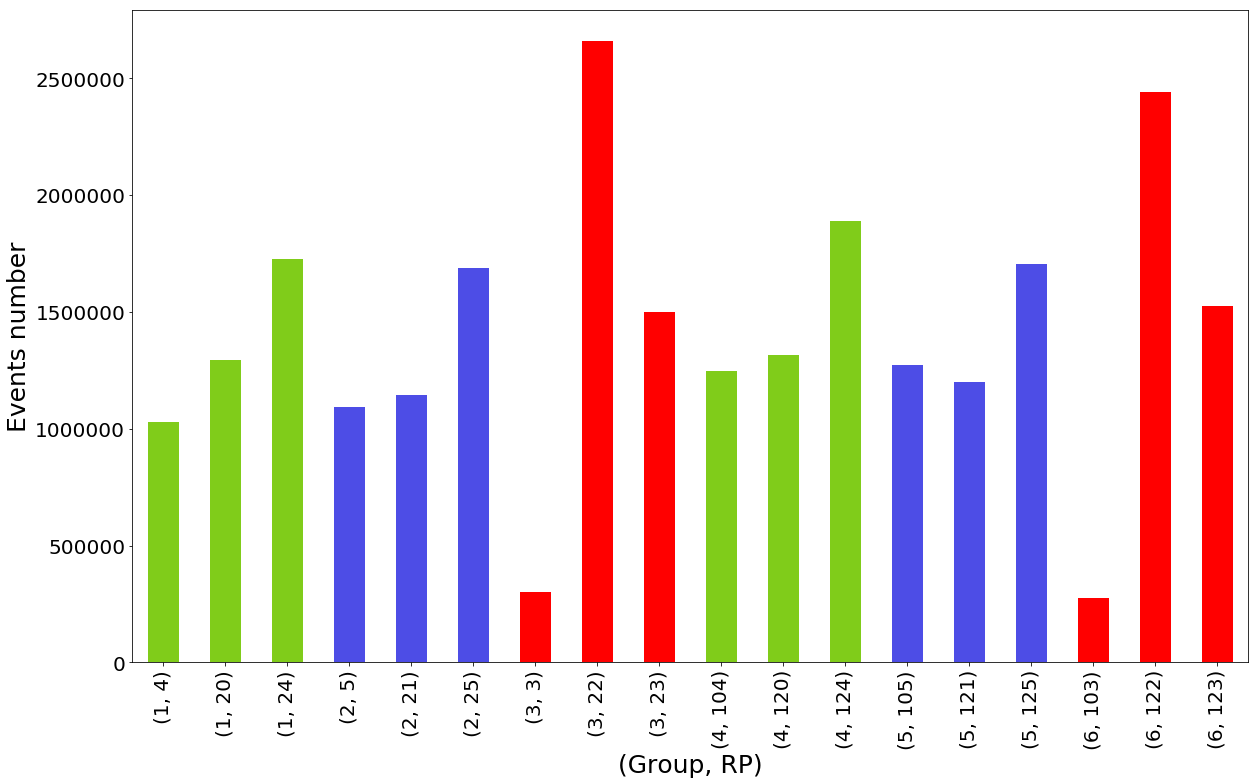

In [206]:
# cm = [[0.9, 0.1, 0.1, 1],
#       [0.9, 0.1, 0.1, 0.5],
#       [0.9, 0.1, 0.1, 0.75]]

# _7_multi_rp_hit_in_group_no_df = get_df_to_plot_7_multi_rp_hit_in_group_no()
# fig = _7_multi_rp_hit_in_group_no_df.plot(kind='bar', figsize=(20, 12), logy=False, 
#                                     color=[[cm[i] for i in _7_multi_rp_hit_in_group_no_df.index.values%3]],
#                                     fontsize=20, title='Number of multi tracking event where given number of RP from one group was hit').get_figure()

cm = [[1.00, 0.0, 0.0, 1],
      [0.50, 0.8, 0.1, 1],
      [0.30, 0.3, 0.9, 1]]

_7a_multi_one_rp_hit_from_group_df = get_df_to_plot_7a_multi_one_rp_hit_from_group()
ax = _7a_multi_one_rp_hit_from_group_df.plot(kind='bar', figsize=(20, 12), logy=False, 
                                        color=[[cm[idx_pair[i]%3] for idx_pair in _7a_multi_one_rp_hit_from_group_df.index.values]],
                                        fontsize=20)#, title='Multi Tracking Events where only one RP from group was hit').get_figure()

ax.title.set_size(25)
ax.set
plt.xlabel('(Group, RP)', fontsize=25)
plt.ylabel('Events number', fontsize=25)
legend = plt.legend(prop={'size': 20})
legend.remove()
fig = ax.get_figure()


fig_filename = store_base + '_7a_multi_one_rp_hit_from_group_df' + '.png'
fig.savefig(fig_filename)

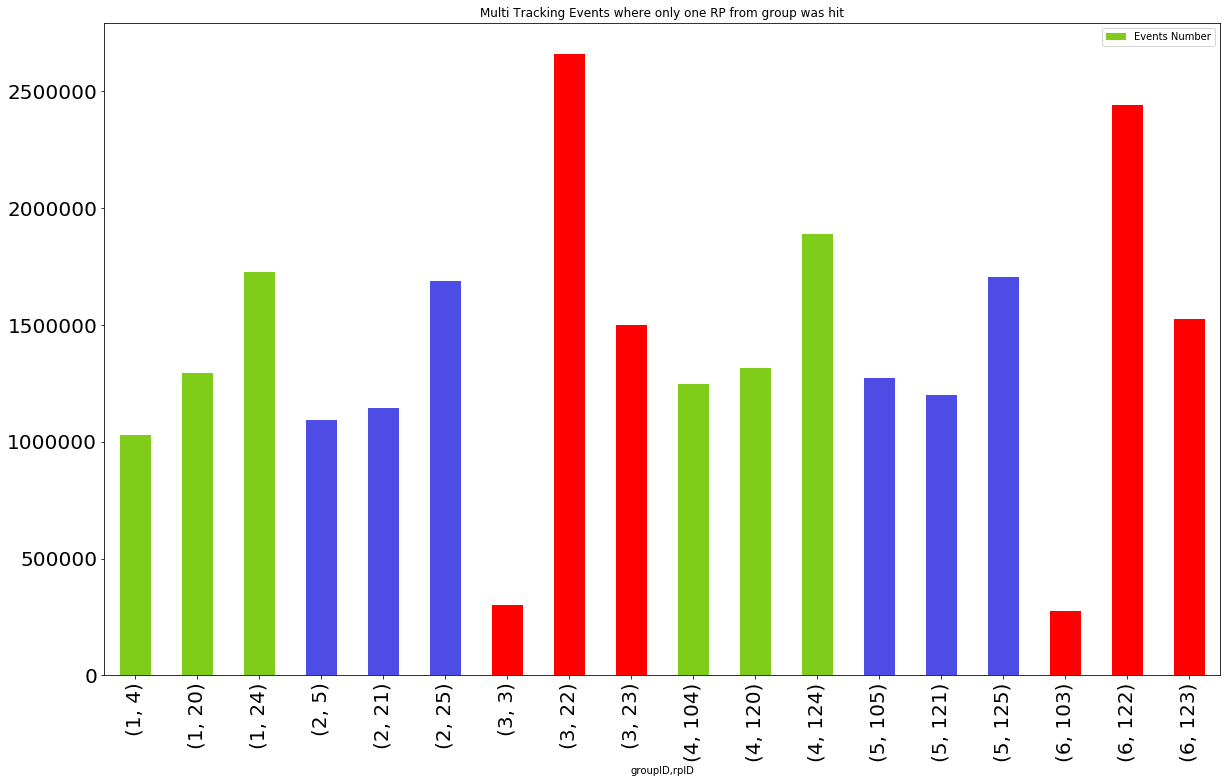

In [26]:
cm = [[1.00, 0.0, 0.0, 1],
      [0.50, 0.8, 0.1, 1],
      [0.30, 0.3, 0.9, 1]]

_7a_multi_one_rp_hit_from_group_df = get_df_to_plot_7a_multi_one_rp_hit_from_group()
_7a_multi_one_rp_hit_from_group_df.plot(kind='bar', figsize=(20, 12), logy=False, 
                                        color=[[cm[idx_pair[i]%3] for idx_pair in _7a_multi_one_rp_hit_from_group_df.index.values]],
                                        fontsize=20, title='Multi Tracking Events where only one RP from group was hit')

### 7b_multi_missing_rp_two_rp_df 

In [27]:
def get_df_to_plot_7b_multi_missing_rp_two_rp_df():
    df = pd.read_csv("results/{0}/{1}/{0}_{1}_7b_multi_missing_rp_two_rp_df.csv".format(FILL, RUN))
    df = df[['groupID', 'rpID', 'In_Events']]
    df = df.set_index(['groupID', 'rpID'])
    df['Missed_Events'] = df['In_Events']
    df = df[['Missed_Events']]
    return df

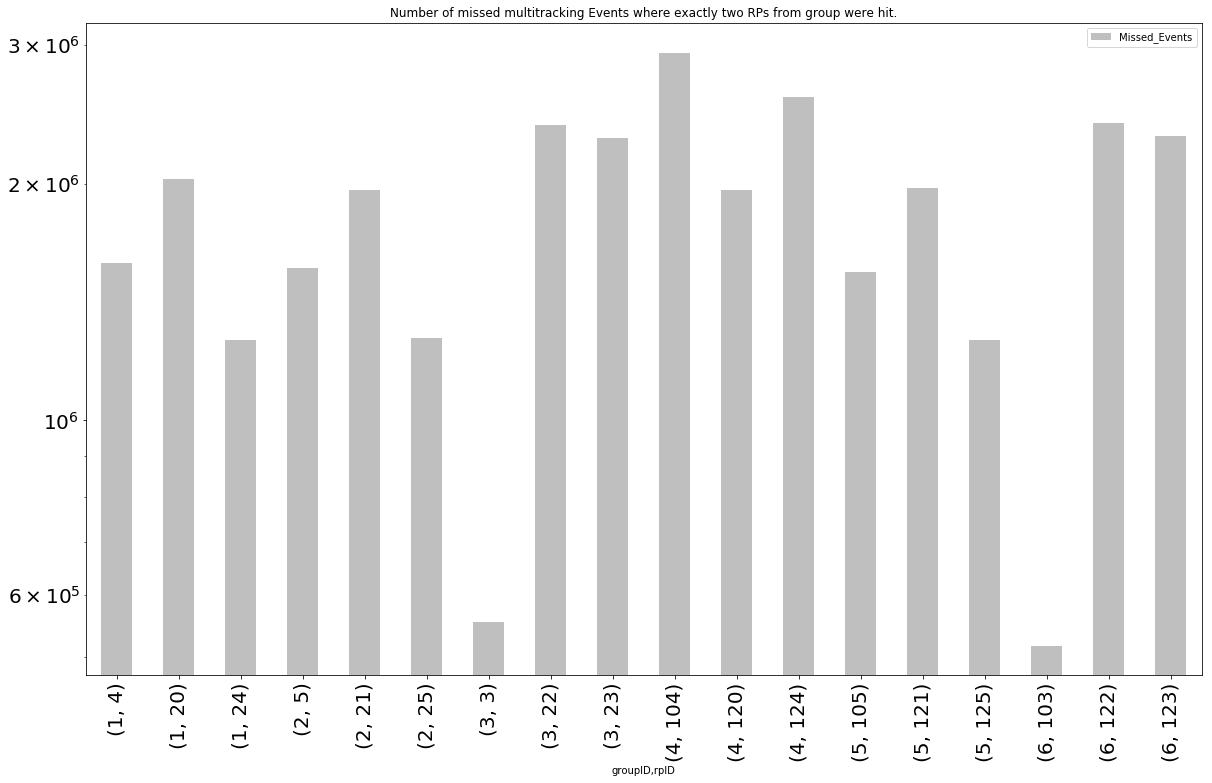

In [28]:
cm = [[0.0, 0.0, 0.0, 0.25]]

_7b_multi_missing_rp_two_rp_df = get_df_to_plot_7b_multi_missing_rp_two_rp_df()
_7b_multi_missing_rp_two_rp_df.plot(kind='bar', figsize=(20, 12), logy=True, 
                                    color=[[cm[0] for i in _7b_multi_missing_rp_two_rp_df.index.values]], 
                                    fontsize=20, title='Number of missed multitracking Events where exactly two RPs from group were hit.')

## MAIN 

In [29]:
def get_it_all_fill_run(): 
    _1_max_line_df = pd.read_csv("results/{0}/{1}/{0}_{1}_1_max_line_df.csv".format(FILL, RUN))    
    _2_max_line_df = pd.read_csv("results/{0}/{1}/{0}_{1}_2_max_line_df.csv".format(FILL, RUN))
    _3_left_rp_hit_df = pd.read_csv("results/{0}/{1}/{0}_{1}_3_left_rp_hit_df.csv".format(FILL, RUN))
    _3_right_rp_hit_df = pd.read_csv("results/{0}/{1}/{0}_{1}_3_right_rp_hit_df.csv".format(FILL, RUN))
    _3_rp_hit_during_event_df = pd.read_csv("results/{0}/{1}/{0}_{1}_3_rp_hit_during_event_df.csv".format(FILL, RUN))
    _4_groups_occurance_df = pd.read_csv("results/{0}/{1}/{0}_{1}_4_groups_occurance_df.csv".format(FILL, RUN))
    _5_horizontal_uv_lines_df = pd.read_csv("results/{0}/{1}/{0}_{1}_5_horizontal_uv_lines_df.csv".format(FILL, RUN))
    _5_vertical_uv_lines_df = pd.read_csv("results/{0}/{1}/{0}_{1}_5_vertical_uv_lines_df.csv".format(FILL, RUN))
    _5_uv_lines_df = pd.read_csv("results/{0}/{1}/{0}_{1}_5_uv_lines_df.csv".format(FILL, RUN))
    _6_single_rp_hit_in_group_no_df = pd.read_csv("results/{0}/{1}/{0}_{1}_6_single_rp_hit_in_group_no_df.csv".format(FILL, RUN))
    _6a_single_one_rp_hit_from_group_df = pd.read_csv("results/{0}/{1}/{0}_{1}_6a_single_one_rp_hit_from_group_df.csv".format(FILL, RUN))
    _6b_single_missing_rp_two_rp_df = pd.read_csv("results/{0}/{1}/{0}_{1}_6b_single_missing_rp_two_rp_df.csv".format(FILL, RUN))
    _7_multi_rp_hit_in_group_no_df = pd.read_csv("results/{0}/{1}/{0}_{1}_7_multi_rp_hit_in_group_no_df.csv".format(FILL, RUN))
    _7a_multi_one_rp_hit_from_group_df = pd.read_csv("results/{0}/{1}/{0}_{1}_7a_multi_one_rp_hit_from_group_df.csv".format(FILL, RUN))
    _7b_multi_missing_rp_two_rp_df = pd.read_csv("results/{0}/{1}/{0}_{1}_7b_multi_missing_rp_two_rp_df.csv".format(FILL, RUN))

# SANDBOX 

In [ ]:
#     1: [4, 20, 24],
#     2: [5, 21, 25],
#     3: [3, 22, 23],
#     4: [104, 120, 124],
#     5: [105, 121, 125],
#     6: [103, 122, 123]

In [74]:
horizontal_rp_last_digits = [2, 3]

def get_pairs_df(horizontal=False):
    right_geom_df =  GEOM_RP_DF.sort_values(by=['z'], ascending=False).reset_index()[:9]
    
    rp_pairs = []
    left_distances = []
    right_distances = []
    
    for idx, row in right_geom_df.iterrows():
        rp_right = int(row['rpID'])
        rp_left = rp_right - 100
        rp_z = row['z']
        
        if horizontal == True and rp_right%10 not in horizontal_rp_last_digits:
            continue
        elif horizontal == False and rp_right%10 in horizontal_rp_last_digits:
            continue
        
        rp_pair = '(RP_{}, RP_{}) at z = [-/+]{}'.format(rp_left, rp_right, rp_z)
        left_distance = AVG_OF_AVG_DF.loc[AVG_OF_AVG_DF['rpId'] == rp_left].iloc[0]['avg_edge_dist']
        right_distance = AVG_OF_AVG_DF.loc[AVG_OF_AVG_DF['rpId'] == rp_right].iloc[0]['avg_edge_dist']
        
        rp_pairs.append(rp_pair)
        left_distances.append(left_distance)
        right_distances.append(right_distance)
    
    pairs_df = pd.DataFrame({'RP pairs': np.array(rp_pairs), 
                             'RP left' : np.array(left_distances), 
                             'RP right' : np.array(right_distances)})
    return pairs_df
    

In [96]:
def plot_pairs(horizontal=False):
    pairs_df = get_pairs_df(horizontal=horizontal)
    
    my_range=range(1,len(pairs_df.index)+1)

    plt.figure(figsize=(16,9))
    
    plt.hlines(y=my_range, xmin=pairs_df['RP left'], xmax=pairs_df['RP right'], color='grey', alpha=0.4)
    plt.scatter(pairs_df['RP left'], my_range, color='skyblue', alpha=1, label='RP left')
    plt.scatter(pairs_df['RP right'], my_range, color='green', alpha=0.4 , label='RP right')
    plt.legend(fontsize=15)

    plt.xticks(fontsize=15)
    plt.yticks(my_range, pairs_df['RP pairs'], fontsize=15)
#     plt.title("Comparison of silicon edges distance between RP from left and right arm", loc='left')

    plt.xlabel('Max [u|v] line number', fontsize=25)
    plt.ylabel('Groups number', fontsize=25)
    
    
    
    if horizontal:
        plt.xlabel('Detector edge x coordinate [mm]', fontsize=25)
    else:
        plt.xlabel('Detector edge y coordinate [mm]', fontsize=25)
    plt.ylabel('RP pairs')

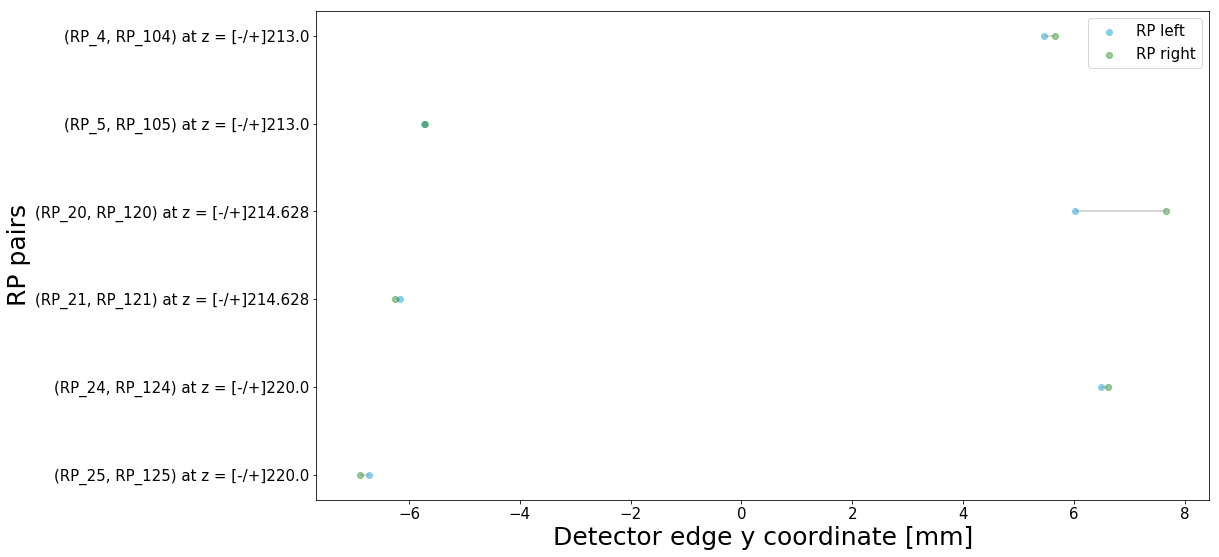

In [100]:
plot_pairs(horizontal=False)

In [35]:
GEOM_RP_DF.sort_values(by=['z'], ascending=False).reset_index()[:9]

,index,rpID,x,y,z
0,23,125,-0.70491,-74.35820,220.000
1,22,124,-0.55503,74.09210,220.000
2,21,123,74.18240,0.03467,219.550
3,20,122,74.89350,1.10521,215.078
4,19,121,-0.09475,-73.72210,214.628
5,18,120,0.65012,75.12860,214.628
6,17,105,10.60810,-72.66690,213.000
7,16,104,-10.30250,72.61760,213.000
8,15,103,74.52650,10.90920,212.550


In [63]:
pairs_df = get_pairs_df(horizontal=True)

In [64]:
pairs_df

,RP left,RP pairs,RP right
0,6.872368,RP_23 - RP_123 at z = [-/+]219.55,6.707658
1,7.348188,RP_22 - RP_122 at z = [-/+]215.078,7.418578
2,7.355048,RP_3 - RP_103 at z = [-/+]212.55,7.568818


Text(0,0.5,'RP pairs')

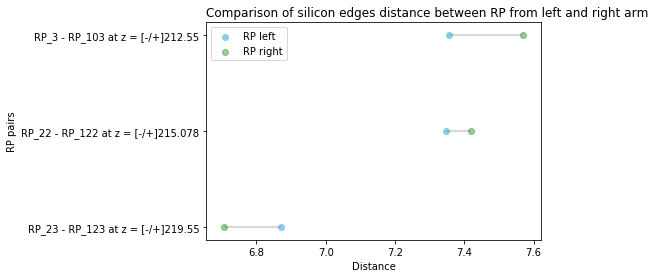

In [65]:
my_range=range(1,len(pairs_df.index)+1)

plt.hlines(y=my_range, xmin=pairs_df['RP left'], xmax=pairs_df['RP right'], color='grey', alpha=0.4)
plt.scatter(pairs_df['RP left'], my_range, color='skyblue', alpha=1, label='RP left')
plt.scatter(pairs_df['RP right'], my_range, color='green', alpha=0.4 , label='RP right')
plt.legend()

plt.yticks(my_range, pairs_df['RP pairs'])
plt.title("Comparison of silicon edges distance between RP from left and right arm", loc='left')
plt.xlabel('Distance')
plt.ylabel('RP pairs')